<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>
<center><h1>MLE10 Midterm - Iain McKone</h1></center>

## Objectives
An intensive analysis of consumer behavior, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.

&nbsp;
## Data
The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset - UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Target Labe;:  `Revenue` is the target label. 
    - This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- Pages visited within Session, and Total Time spent in each category:
    - `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` 
    - Each represents the number of different types of pages visited by the visitor in that session 
    - and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
    - The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
    - The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
    - Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day
    - (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
    - The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes 
    - operating system, browser, region, traffic type, 
    - visitor type as returning or new visitor, 
    - a boolean value indicating whether the date of the visit is weekend, and month of the year.

&nbsp;
## Tasks
### (50pts) Task 1:    Classification:  Build a highly predictive classification model
    a. Train the model for months June-Dec
    b. Test the model for months Feb-Mar
    c. Fit a logistic regression model
    d. Fit at least one other classification model
    e. Find and explain important features
    f.  Report and interpret the most meaningful classifications metrics
    g.  Show and explain the hyper-parameter fitting process.

    Point breakdown:
    - (10 pts)  Basic exploratory data analysis (EDA) 
                - Appropriate univariate descriptive statistics and figures
                - Appropriate bi-variate descriptive statistics and figures
    - ( 5 pts)  Advanced EDA
                - Free-response, shows us what they know! 
    - ( 5 pts)  Train/test split
    - (10 pts)  Feature selection
    - (15 pts)  Model fitting
    - ( 5 pts)  Performance points 

&nbsp;
### (25pts) Task 2:     Customer Segmentation
    a. Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 
    b. Cluster Analysis
        - How many clusters do you see? 
        - What are the significant differences between the various clusters in terms of:
            - the size of the clusters and 
            - purchase ratio. 
        - Perform as detailed analysis of the clusters as you can.
    c. Return plots and cluster images generated for the data.
    d. Perform a detailed analysis for each cluster corresponding to 
        - the variations in features and 
        - identify some behaviors corresponding to each particular cluster (e.g., 
            - which cluster represent new shoppers vs. 
            - brand conscious shoppers etc.).

    Point breakdown:
    - (15 pts)  Clustering code
    - (10 pts)  Clustering analysis

&nbsp;
### (15pts) Task 3:     Semi-Supervised Learning
    a. Consider you have training data with the `Revenue` attribute for records from June—September only. 
    b. For all records from October—December, however, `Revenue` attribute is missing. 
    c. Build a semi-supervised self-labeling model to estimate `Revenue` for the missing records in October—December 
        and then fit your classifier. 
    d. Report classification performance on February—March data set with and without the self-labeled data.

    1. If you do not consider the records from October—December, 
        a. generate the classification performance on test data
    2. After using the self-labeled data and training data together, 
        a. does the classification performance on test data improve? 
        b. Discuss which metrics are most important for your conclusion.

    Point breakdown:
    - (2 pts) Correctly split the data by month into labeled, unlabeled, and test 
    - (8 pts) Generate labels for unlabeled samples with a self labeling technique
    - (5 pts) Compare and contrast performance difference on test dataset between 
        a. labels only and 
        b. labels & self-labels

&nbsp;
### (10pts) Style and clarity
    a. Write clear, readable, well-commented code following [PEP8](https://peps.python.org/pep-0008/); also 
    b. include explanations in markdown cells, where appropriate. 

&nbsp;
## Deliverables:
- GitHub link to a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.


## Pre-reqs

### Visual Studio Code:  local jupyter development
- Ctl+Shift+P:  ensure that the correct Python interpreter is selected
- Terminal:  activate conda environment
- Jupyter Notebook:  select environment

In [117]:

#---  Declarations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import *


In [118]:


#--- module variables
from pathlib import Path


#--- set path refs
pth_pwd = Path().absolute()

kstr_pth_pwd = str(pth_pwd) + "/"
kstr_pth_data = kstr_pth_pwd + "dat/"


# Task 1:  Classification:  Build a highly predictive classification model
    a. Train the model for months June-Dec
    b. Test the model for months Feb-Mar
    c. Fit a logistic regression model
    d. Fit at least one other classification model
    e. Find and explain important features
    f. Report and interpret the most meaningful classifications metrics
    g. Show and explain the hyper-parameter fitting process.

In [119]:

#--- load the data from csv
pdf_raw_csv = pd.read_csv(kstr_pth_data + "online_shoppers_intention.csv.gz", compression='gzip')


## Exploratory Data Analysis:  Inspect the loaded data

In [120]:

#--- look at overall dataframe shape
print("INSPECT:  Dataset shape:  ", pdf_raw_csv.shape)


#--- Inspect:  class imbalance
lngNumRev = pdf_raw_csv[pdf_raw_csv["Revenue"] == True].shape[0]
lngNumNoRev = pdf_raw_csv[pdf_raw_csv["Revenue"] == False].shape[0]
print("INSPECT:  Dataset target breakdown - hasRev:", lngNumRev, "  hasNoRev:", lngNumNoRev)


#--- inspect:  dataframe values
pdf_raw_csv.head()

INSPECT:  Dataset shape:   (12330, 18)
INSPECT:  Dataset target breakdown - hasRev: 1908   hasNoRev: 10422


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### EDA:  inspect some basic stats

In [121]:

#--- inspect:  dataframe stats
pdf_raw_csv.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [122]:


#--- inspect distribution of nulls
pdf_raw_csv.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [123]:

#--- inspect column data types
pdf_raw_csv.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### EDA:  Inspect each category of page type;  duration, bounce, exit

In [124]:

#--- function to inspect stats by categorical page type
def inspect_byPageType(strPageType):
    pdf_pageSumm = pdf_raw_csv[pdf_raw_csv[strPageType] > 0]
    pdf_pageSumm = pdf_pageSumm.groupby(strPageType).agg({
        strPageType + '_Duration': ['sum', 'mean'],
        'BounceRates': ['mean'],
        'ExitRates': ['mean'],
        'PageValues': ['mean'],
    })
    pdf_pageSumm = pdf_pageSumm.sort_values(by=(strPageType + "_Duration", "mean"), ascending=False)
    return pdf_pageSumm

In [125]:

#--- Administrative:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_adminSumm = inspect_byPageType('Administrative')
pdf_adminSumm.head()


Administrative_Duration              BounceRates ExitRates  \
                                   sum         mean        mean      mean   
Administrative                                                              
26                         1561.717567  1561.717567    0.011055  0.014200   
22                         4017.768757  1004.442189    0.008919  0.021013   
27                          853.735949   853.735949    0.002099  0.009347   
20                         1507.131273   753.565636    0.007119  0.018682   
21                         1237.072647   618.536324    0.003704  0.011387   

               PageValues  
                     mean  
Administrative             
26              19.567464  
22              49.002687  
27               4.511100  
20               4.276907  
21               0.274406

In [126]:

#--- Product:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_prodSumm = inspect_byPageType('ProductRelated')
pdf_prodSumm.head()

ProductRelated_Duration              BounceRates ExitRates  \
                                   sum         mean        mean      mean   
ProductRelated                                                              
449                        63973.52223  63973.52223    0.000764  0.027701   
705                        43171.23338  43171.23338    0.004851  0.015431   
343                        29970.46597  29970.46597    0.005316  0.028971   
517                        27009.85943  27009.85943    0.004385  0.014594   
584                        24844.15620  24844.15620    0.002099  0.009347   

               PageValues  
                     mean  
ProductRelated             
449              0.000000  
705              0.763829  
343              0.000000  
517              8.403164  
584              4.511100

In [127]:

#--- Informational:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_prodSumm = inspect_byPageType('Informational')
pdf_prodSumm.head()

Informational_Duration              BounceRates ExitRates  \
                                 sum         mean        mean      mean   
Informational                                                             
24                       2050.433333  2050.433333    0.004851  0.015431   
13                       1949.166667  1949.166667    0.005316  0.028971   
11                       1258.833333  1258.833333    0.001938  0.014674   
16                       1210.397619  1210.397619    0.003175  0.012764   
14                       1787.566667   893.783334    0.004916  0.019695   

              PageValues  
                    mean  
Informational             
24              0.763829  
13              0.000000  
11              3.382877  
16              0.000000  
14             17.229718

### EDA:  Inspect the distribution of data values per feature

/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

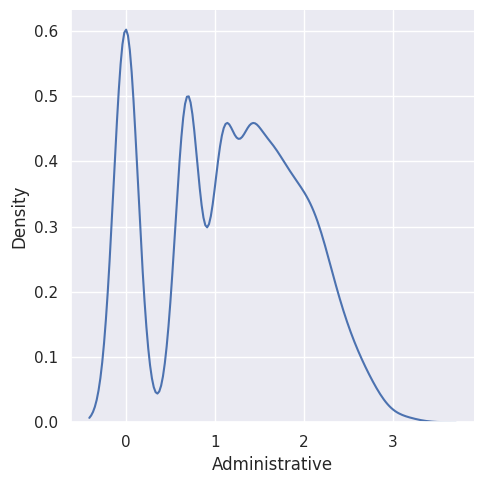

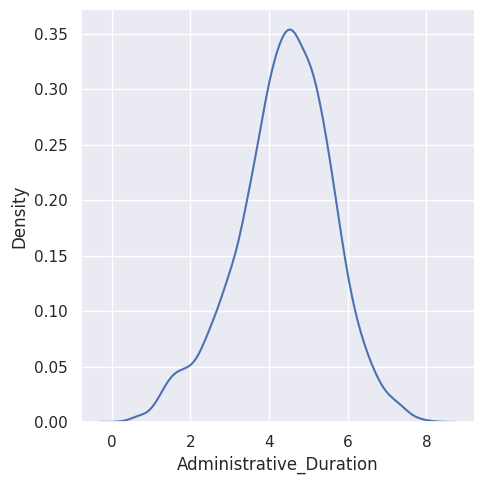

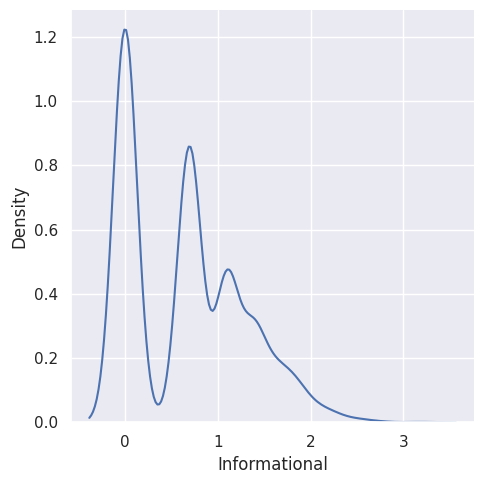

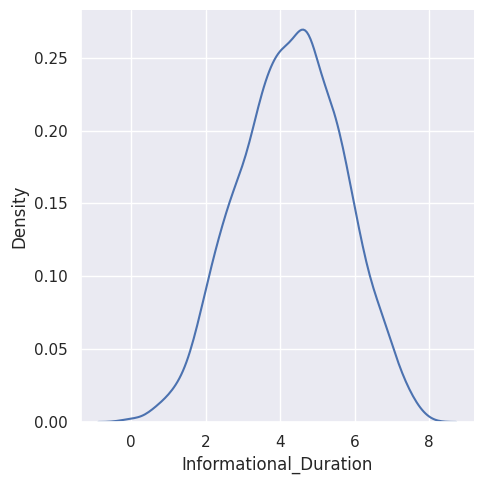

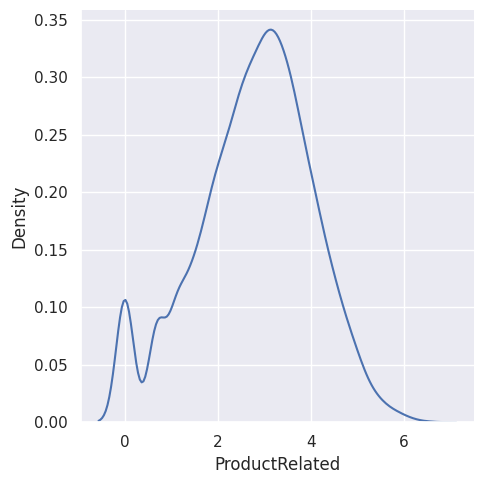

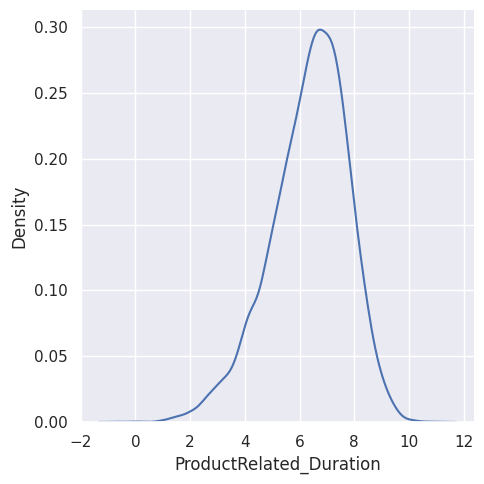

In [128]:
%matplotlib inline
sns.set()

#--- get the list of cols from the csv
aryCols = pdf_raw_csv.iloc[:, 0:6].columns

#--- 
for colName in aryCols:
  sns.displot(np.log(pdf_raw_csv[colName]), kind="kde",)

#### Findings:
- Page Types
    - ProductRelated pages display a normal distribution.  
    - Administrative and  Informational have some visibile variability
- Durations
    - the durations are for the most part normal distributions


### EDA:  Inspect All Activity by Month 

<AxesSubplot:xlabel='Month'>

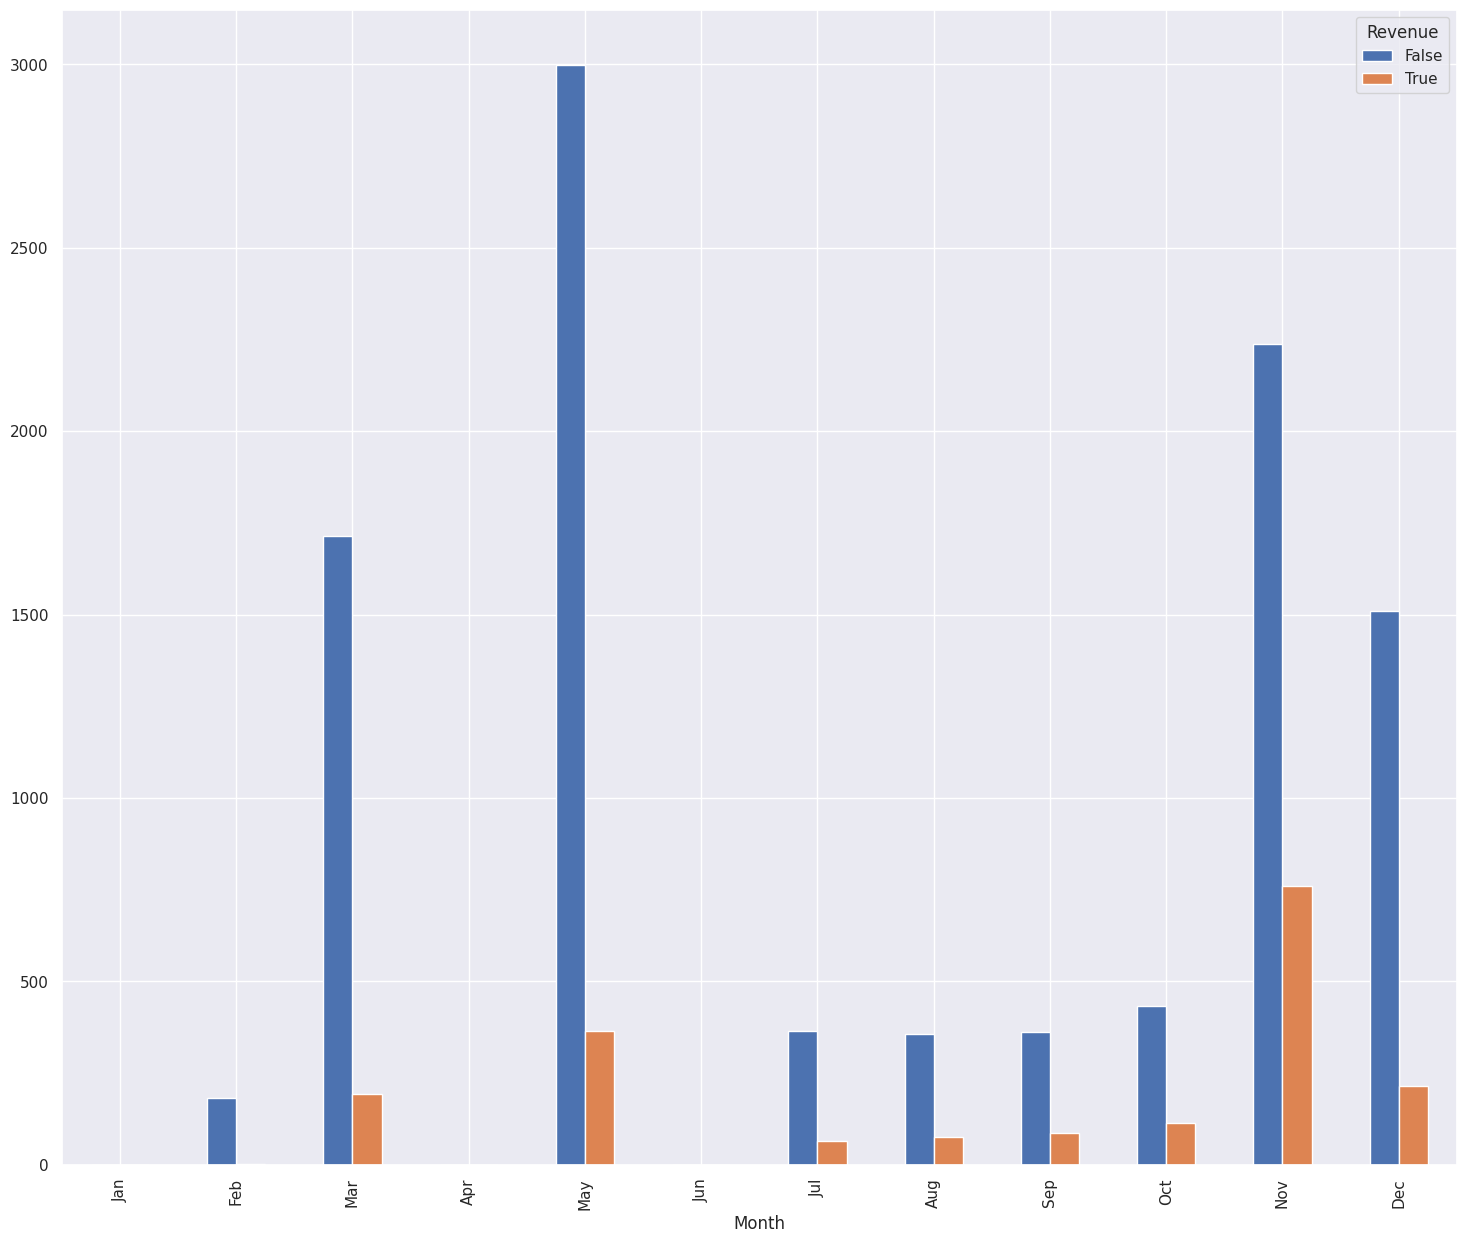

In [129]:
pdf_allActPerMonth = pdf_raw_csv.copy()
aryMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pdf_allActPerMonth['Month'] = pd.Categorical(pdf_allActPerMonth['Month'], 
                                          categories=aryMonths, 
                                          ordered=True)
pdf_allActPerMonth.pivot_table(index=['Month'], columns='Revenue', aggfunc='size').plot(kind='bar')

#### Findings:  revenue distribution
- March, May, Nov and Dec are the months with flagged revenue
- these months are also the months with the greatest activity;  ie even traffic with no associated revenue
- Q:  is it possible that some of the traffic tied to no revenue represents the browsing activity of the future purchsers, but in different sessions within the month? 


### EDA:  inspect revenue distribution, and activity distribution by month

In [130]:

#--- get the count of revenue instances by month
pdf_revByMonth = pdf_allActPerMonth[pdf_allActPerMonth["Revenue"]==True]
pdf_numRevByMonth = pdf_revByMonth.groupby("Month").size().reset_index(name="Percentage")
lngTotRevCount = pdf_revByMonth.shape[0]            #--- this is the total number of revenue instances

#--- calc %distribution of revenue instances by month (note: this is not by $revenue, but revenue _counts_)
pdf_numRevByMonth["Percentage"] = np.round((pdf_numRevByMonth["Percentage"]/lngTotRevCount)*100, 2)

pdf_numRevByMonth

,Month,Percentage
0,Jan,0.00
1,Feb,0.16
2,Mar,10.06
3,Apr,0.00
4,May,19.13
5,Jun,0.00
6,Jul,3.46
7,Aug,3.98
8,Sep,4.51
9,Oct,6.03


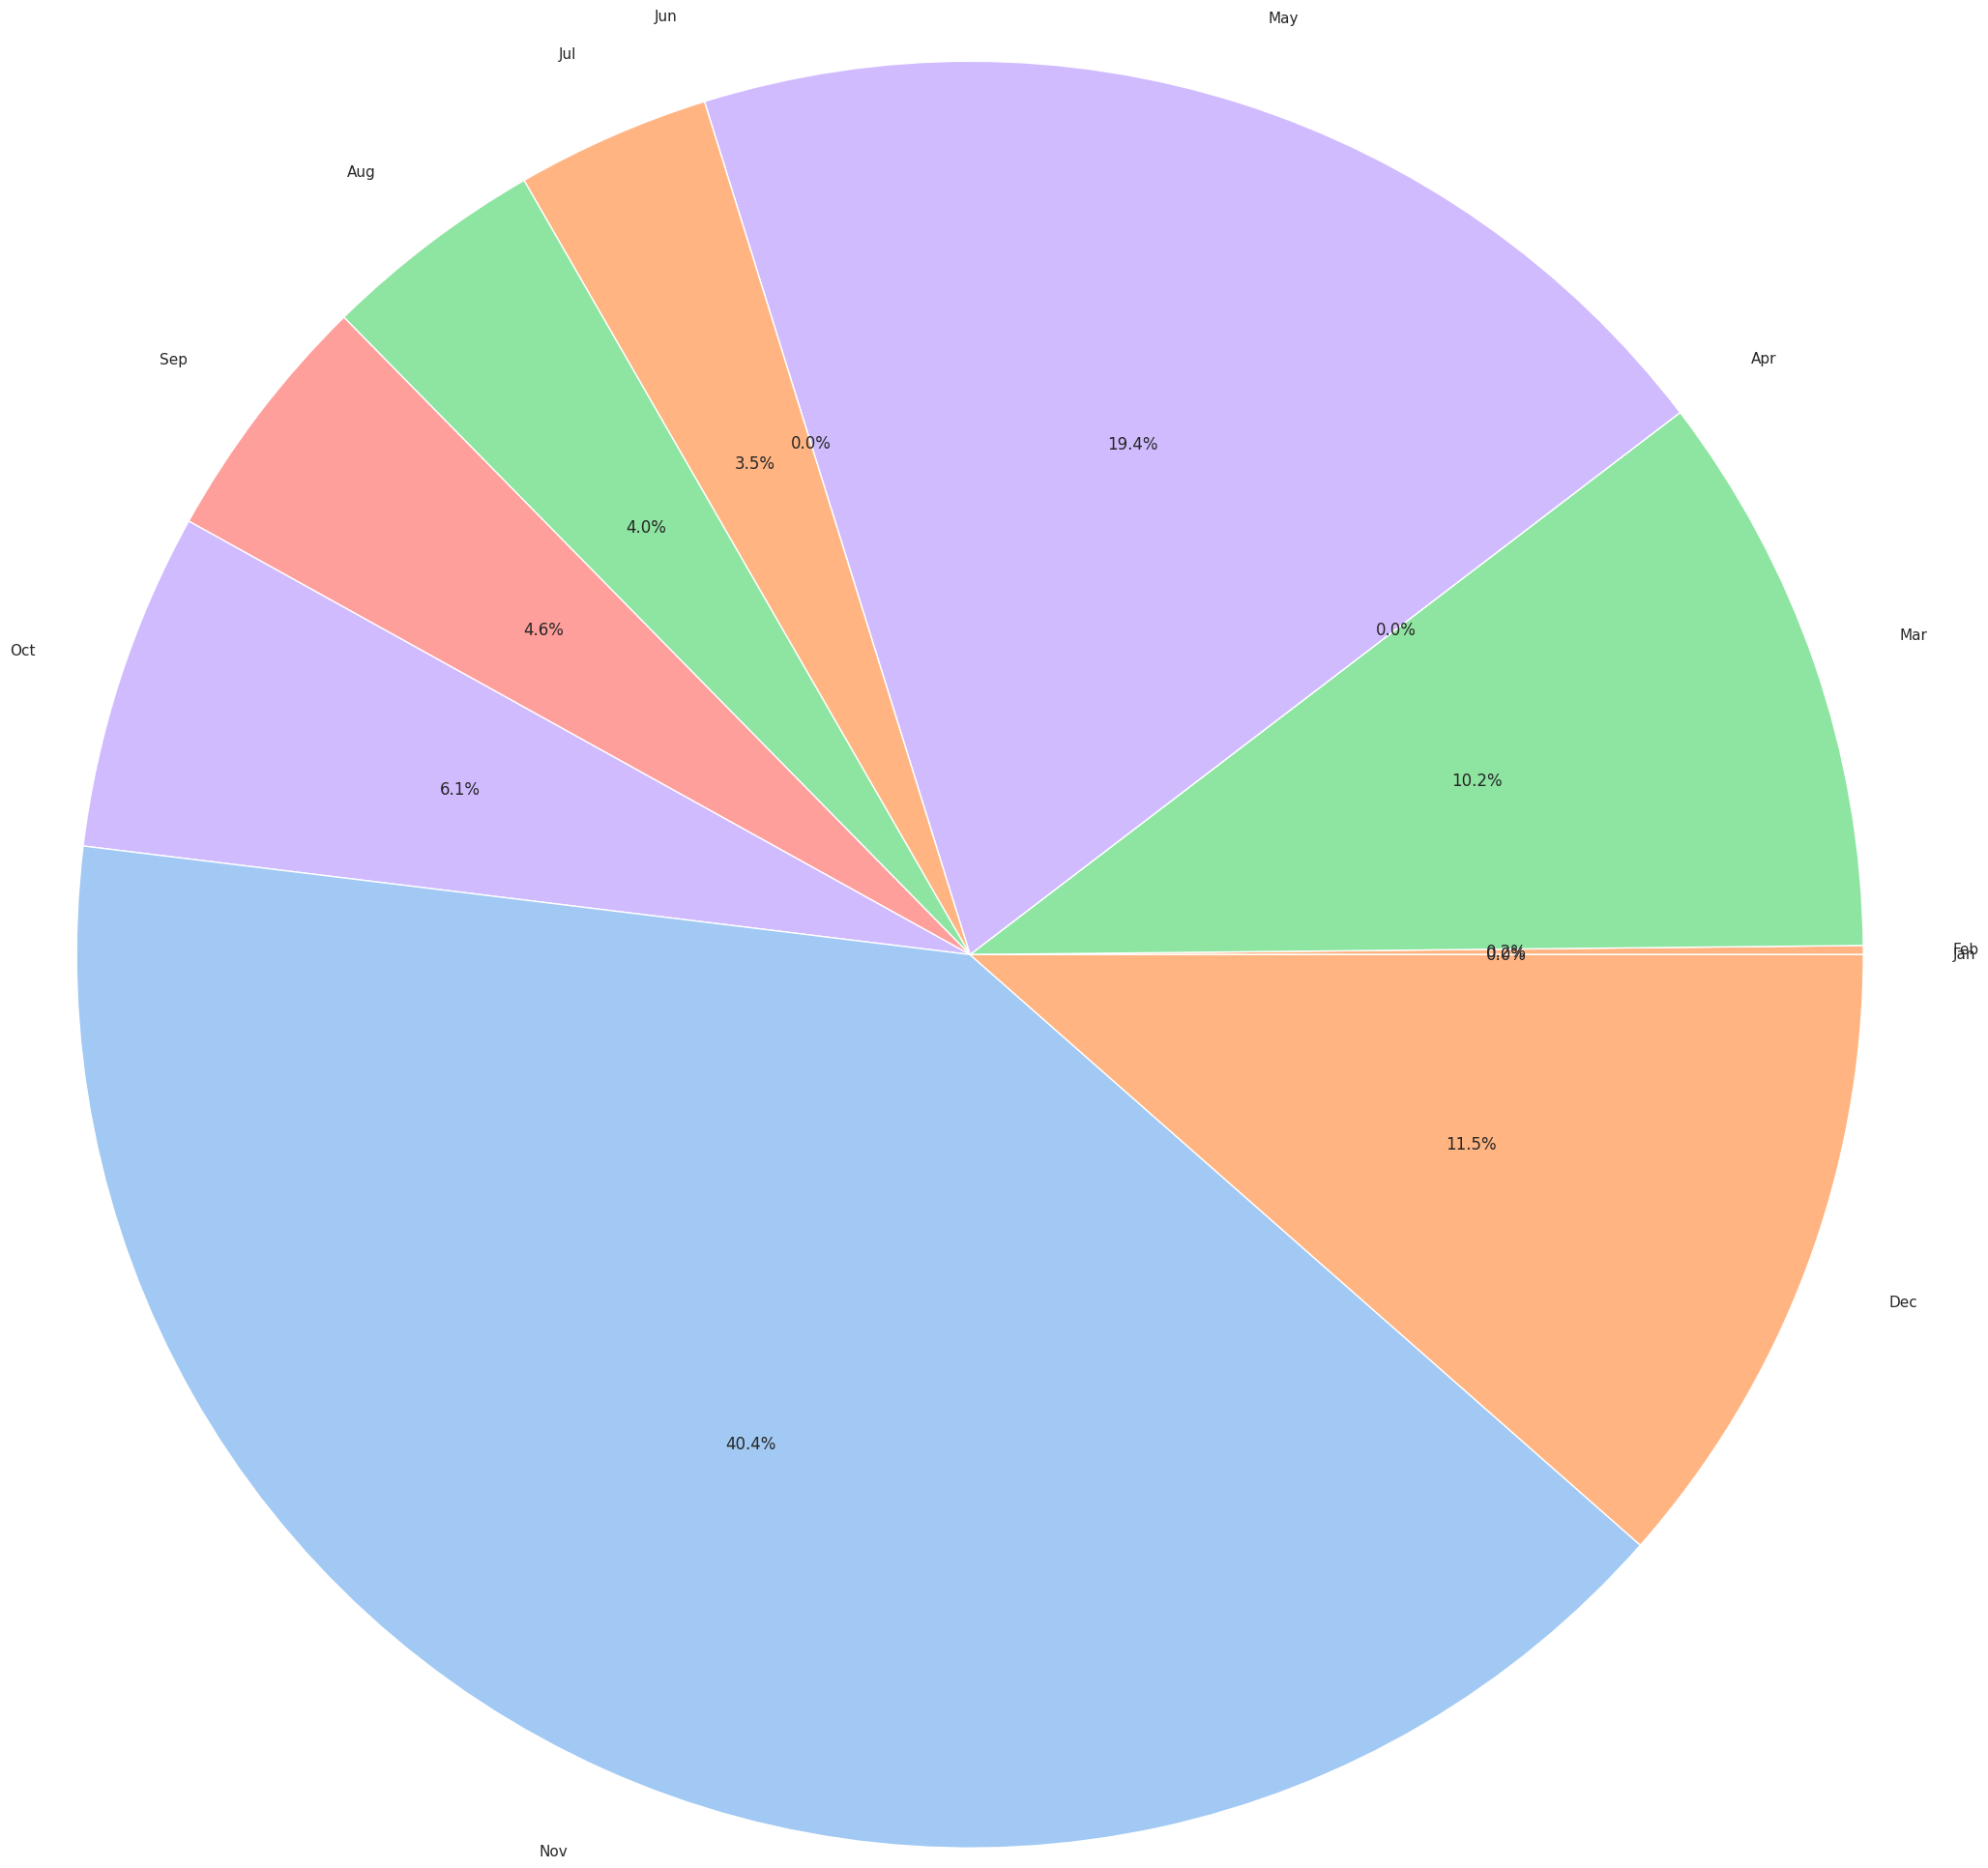

In [131]:

#--- create pie chart %distribution of revenue _instances_ by month
colors = sns.color_palette('pastel')[0:5]
plt.pie(pdf_numRevByMonth["Percentage"],labels= pdf_numRevByMonth["Month"], colors = colors, autopct='%.1f%%',radius=2)
plt.show()


#### Findings:  Confirmed revenue distribution (by count)
- the majority of revenue instances occured (desc order):  Nov - 40.4%, May - 19.4%, Dec - 11.5%, Mar - 10.2%
- note:  this is by count of revenue instance, not $size of sale 


### EDA:  inspect data distribution for BounceRates, ExitRates, PageValues, Revenue
- inspect the relationship between the features
- inspect the distribution of Revenue/No_Revenue 

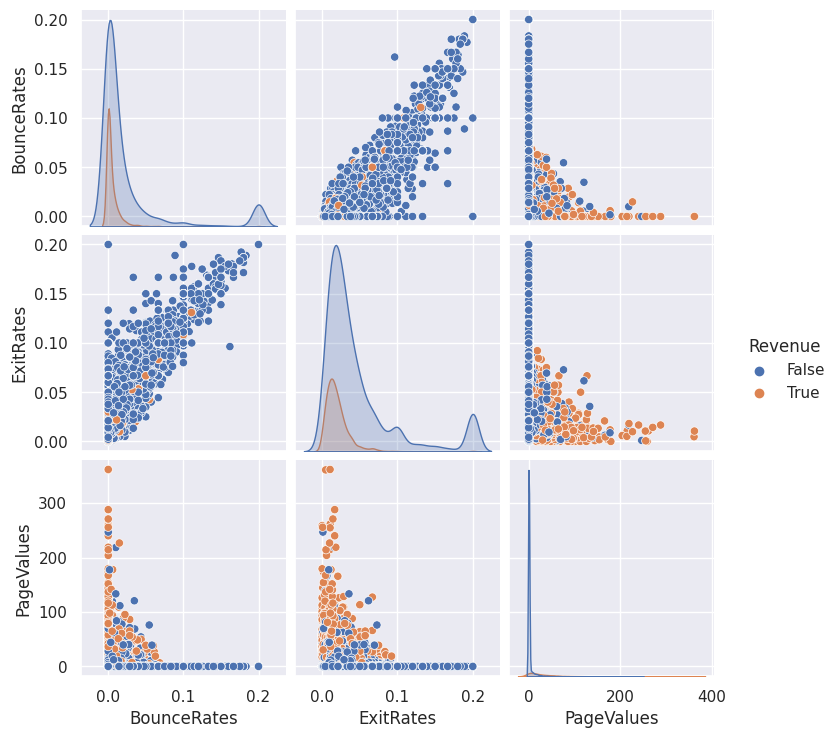

In [132]:
sns.pairplot(pdf_allActPerMonth[["BounceRates","ExitRates","PageValues","Revenue"]], hue="Revenue")

#### Findings:  
- The data with revenue has relatively low BounceRates,  and ExitRates however high PageValues
- ExitRates and BouceRates look like they have a roughly linear relationship
- Q:  Does this support the earlier hypothesis that people who purchase are returning visitors who may ave been browsing then, but with a known intention to buy now?


### EDA:  convert non-numeric cols to numeric

In [133]:
#--- map binary columns (Y/N to 1/0):  Weekend, Revenue
pdf_map = pdf_raw_csv.copy()
for strCol, colItems in pdf_map[["Revenue","Weekend"]].items():
    # Apply the mapping to the current column with the map() method for Pandas Series
    pdf_map[strCol] = colItems.map({ True : 1 , False : 0})

pdf_map.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [134]:
#--- map the month col values
map_months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 
            }

pdf_map['Month'] = pdf_map['Month'].map(map_months)

pdf_map.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


### Train / Test Split

In [135]:

#--- ready train dataset:   months June-Dec
#--- ready test dataset:    months Feb-Mar
#--- Note:  the train and test dataets both exclude May,  one of the highest months for shopper activity, and revenue
aryTrainMths = [6,7,8,9,10,11,12]
aryTestMths = [2,3]

pdfTrain = pdf_map[pdf_map['Month'].isin(aryTrainMths)]
pdfTest = pdf_map[pdf_map['Month'].isin(aryTestMths)]

y_train = pdfTrain.pop('Revenue')
X_train = pdfTrain.to_numpy()

y_test = pdfTest.pop('Revenue')
X_test = pdfTest.to_numpy()
 

In [136]:

#--- inspect the train and test datasets
X_train.shape,  X_test.shape

((6875, 17), (2091, 17))

In [137]:

#--- look at the distribution of revenue in train and test
klngCountTrainRev = len(y_train[y_train ==1])
klngCountTestRev = len(y_test[y_test ==1])

print("INFO:  Distribution of revenue over train - ", klngCountTrainRev, ", and test - ", klngCountTestRev )

INFO:  Distribution of revenue over train -  1348 , and test -  195


In [138]:

#--- look at the stat distr for train and test data
#--- get the list of columns
aryColsTrain = pdfTrain.columns
#aryColsTrain = np.delete(aryColsTrain, -1)               #--- remove the Revenue col (lastIdx) from the array as it was moved to y_train
print("INFO - columns (X_train):  ", aryColsTrain)

print("\nINFO - Summary Statistics (Train):  ")
pdf_xTrain = pd.DataFrame(X_train, columns=aryColsTrain)
pdf_xTest = pd.DataFrame(X_test, columns=aryColsTrain)
pdf_xTrain.describe().T    #--- describe the dataframe;  transpose

INFO - columns (X_train):   Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

INFO - Summary Statistics (Train):  


,count,unique,top,freq
Administrative,6875,27,0,2878
Administrative_Duration,6875.0,2504.0,0.0,2954.0
Informational,6875,14,0,5254
Informational_Duration,6875.0,964.0,0.0,5394.0
ProductRelated,6875,302,1,296
ProductRelated_Duration,6875.0,6046.0,0.0,357.0
BounceRates,6875.0,1438.0,0.0,2959.0
ExitRates,6875.0,3268.0,0.2,326.0
PageValues,6875.0,1673.0,0.0,5188.0
SpecialDay,6875.0,1.0,0.0,6875.0


### Univariate Analysis

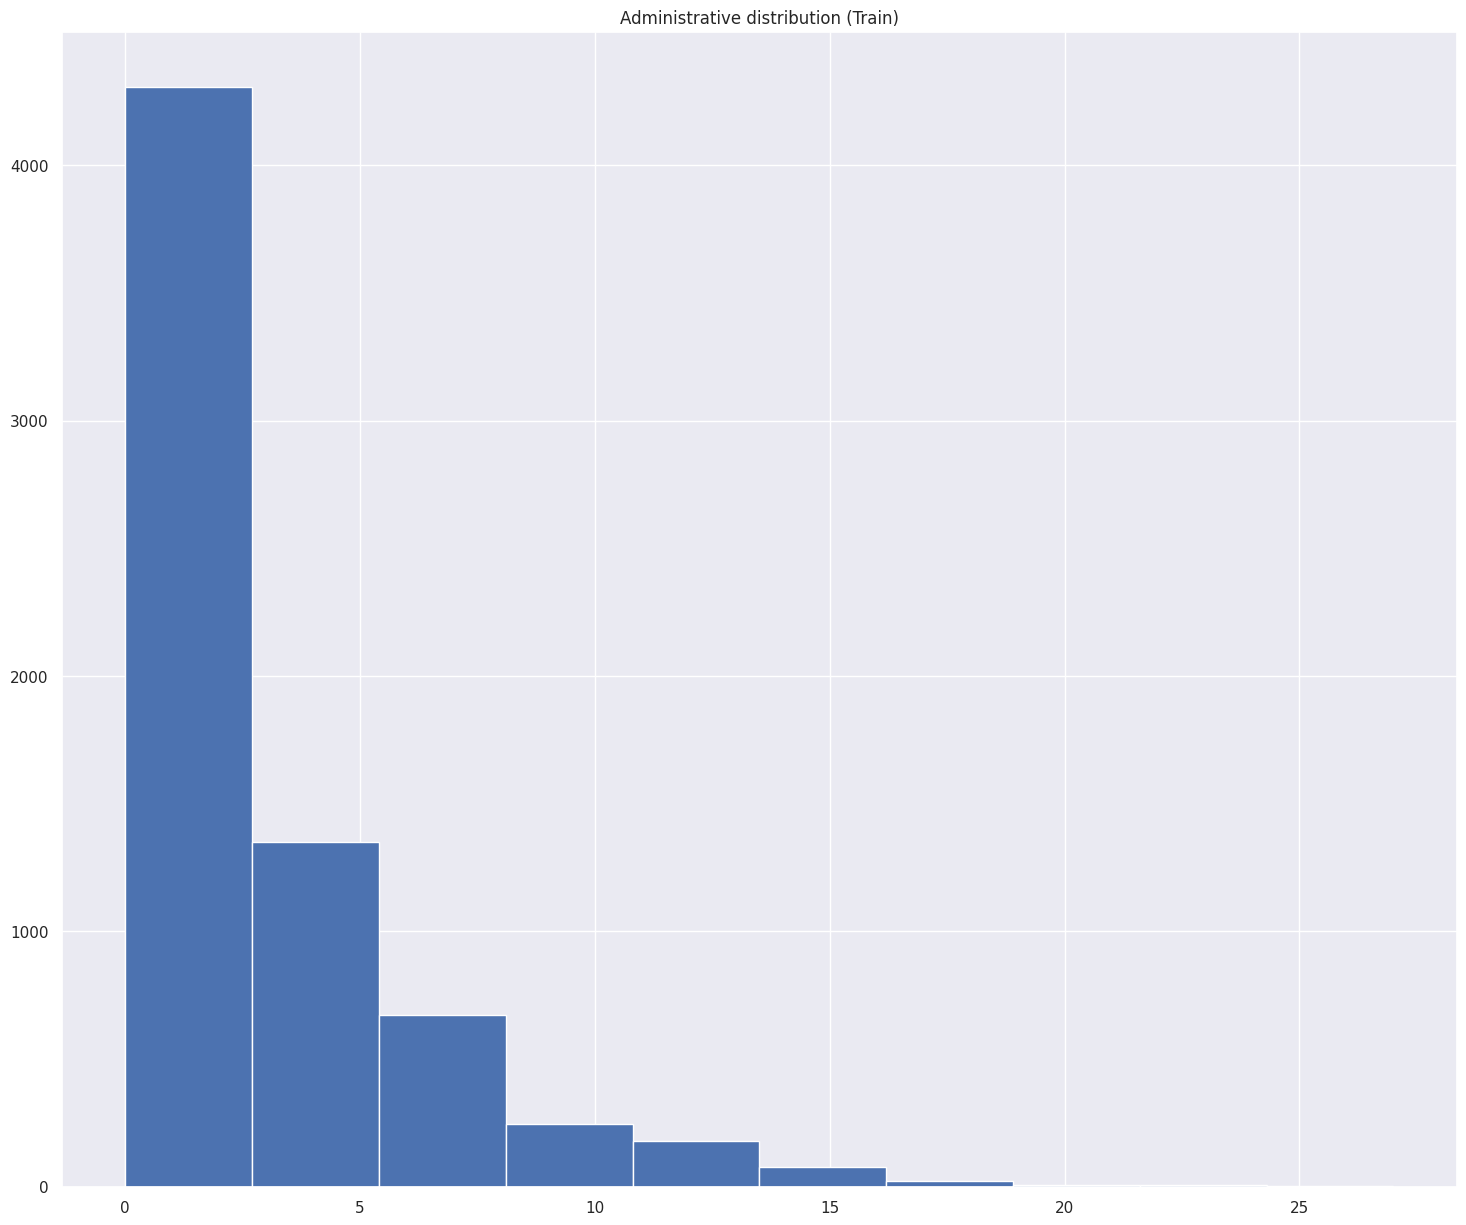

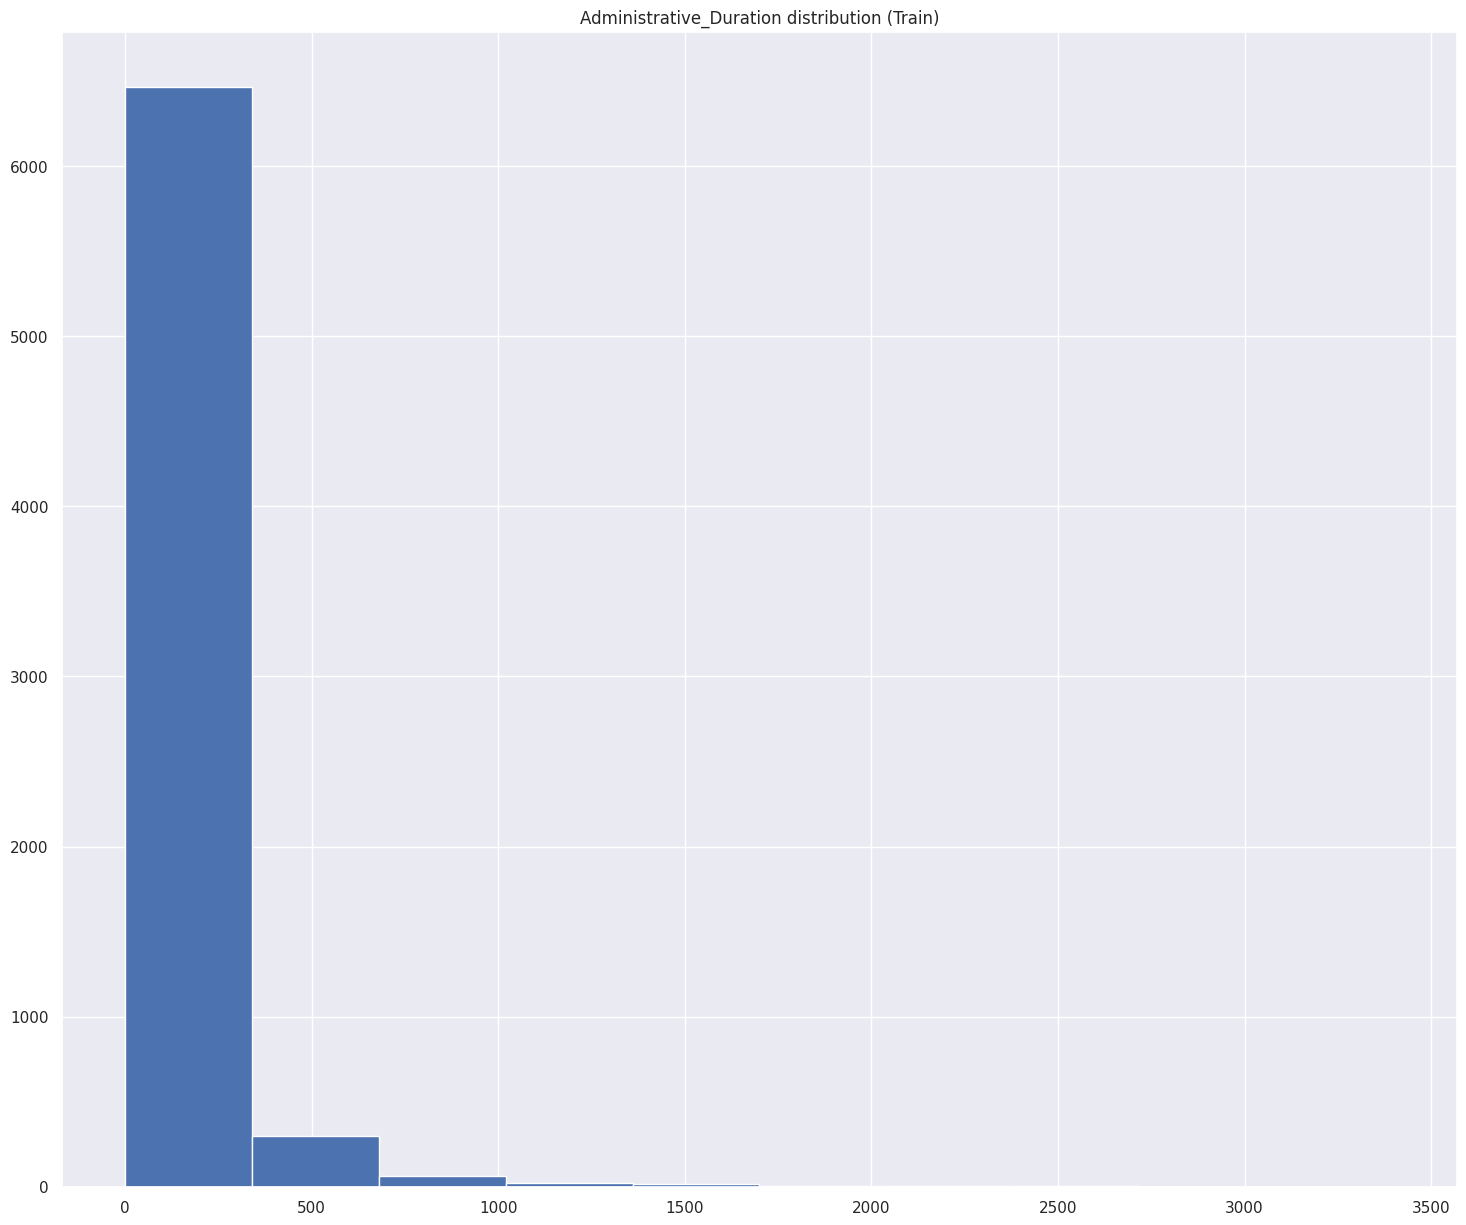

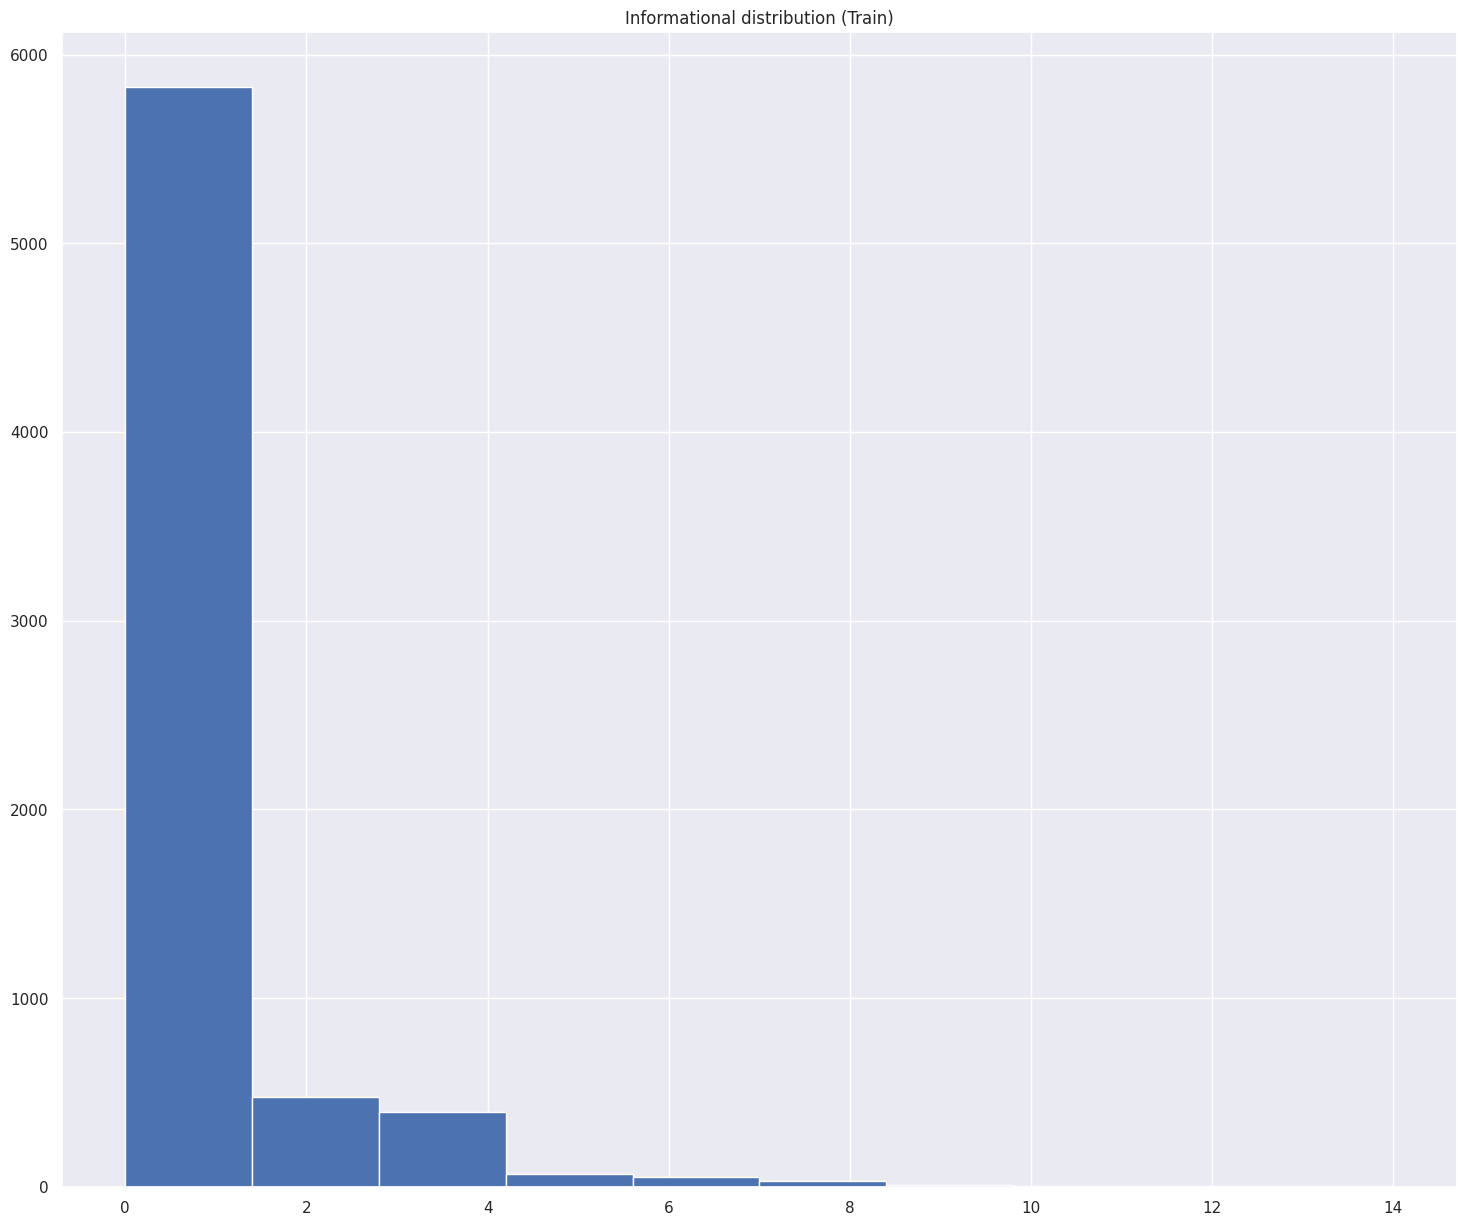

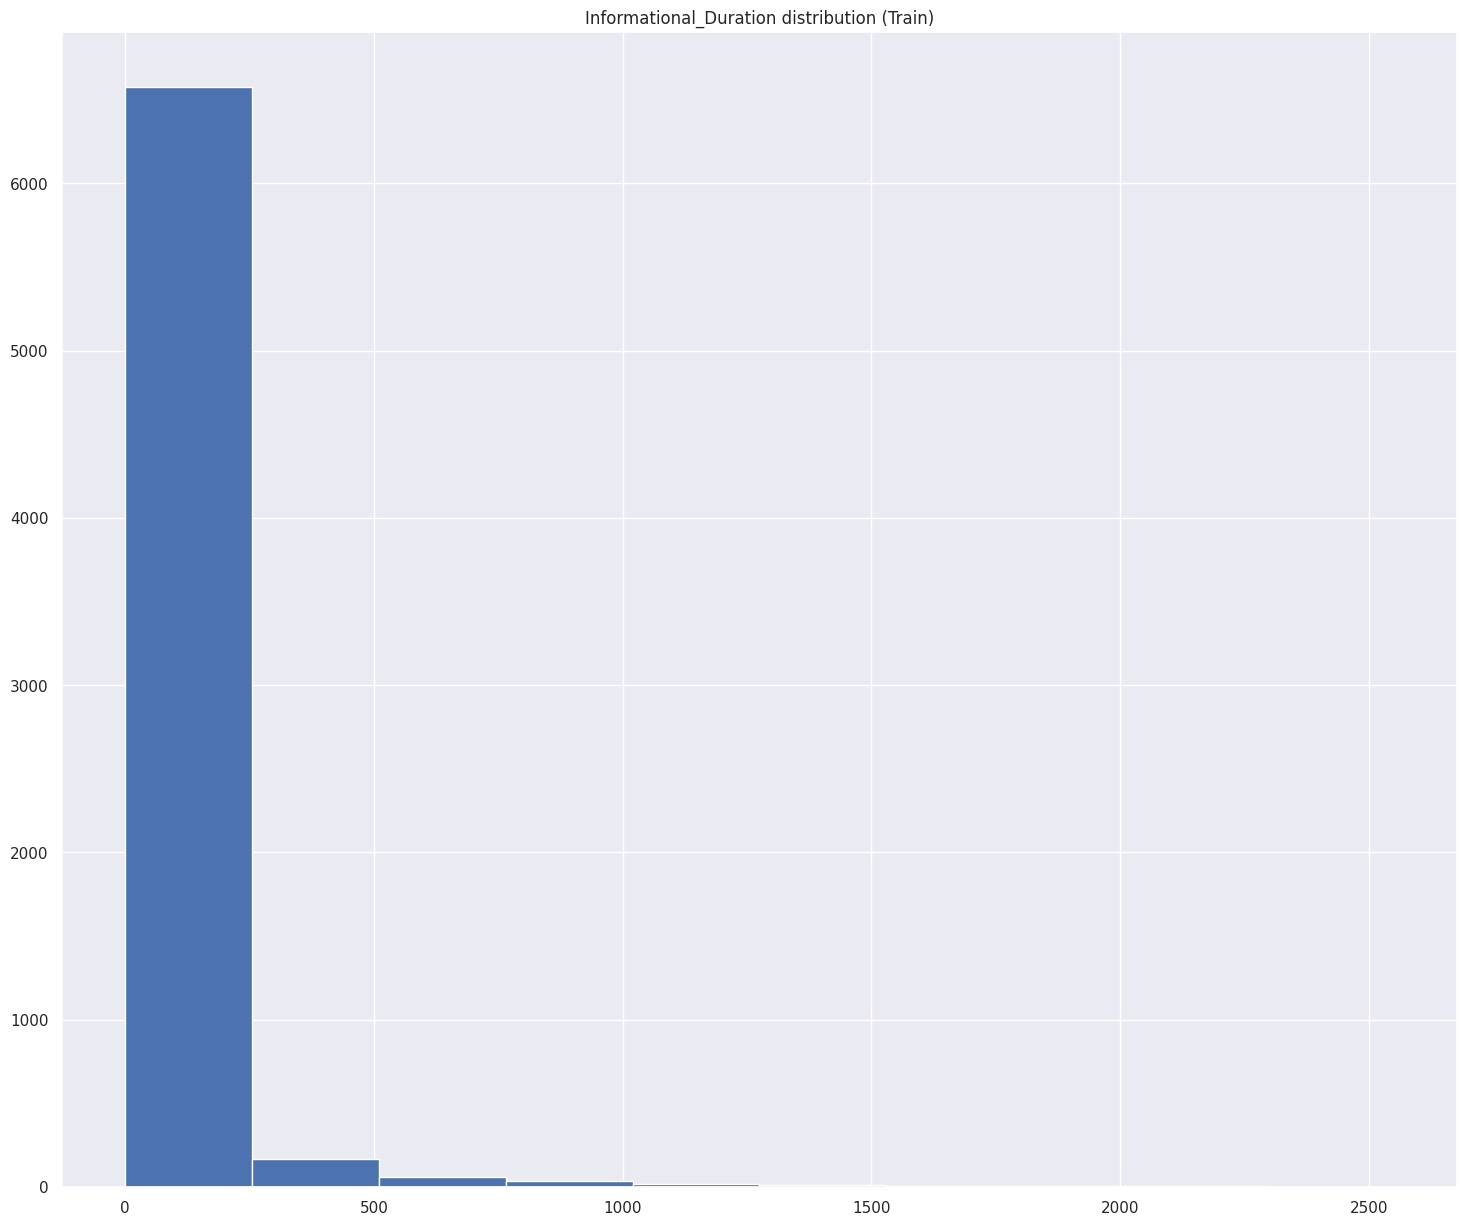

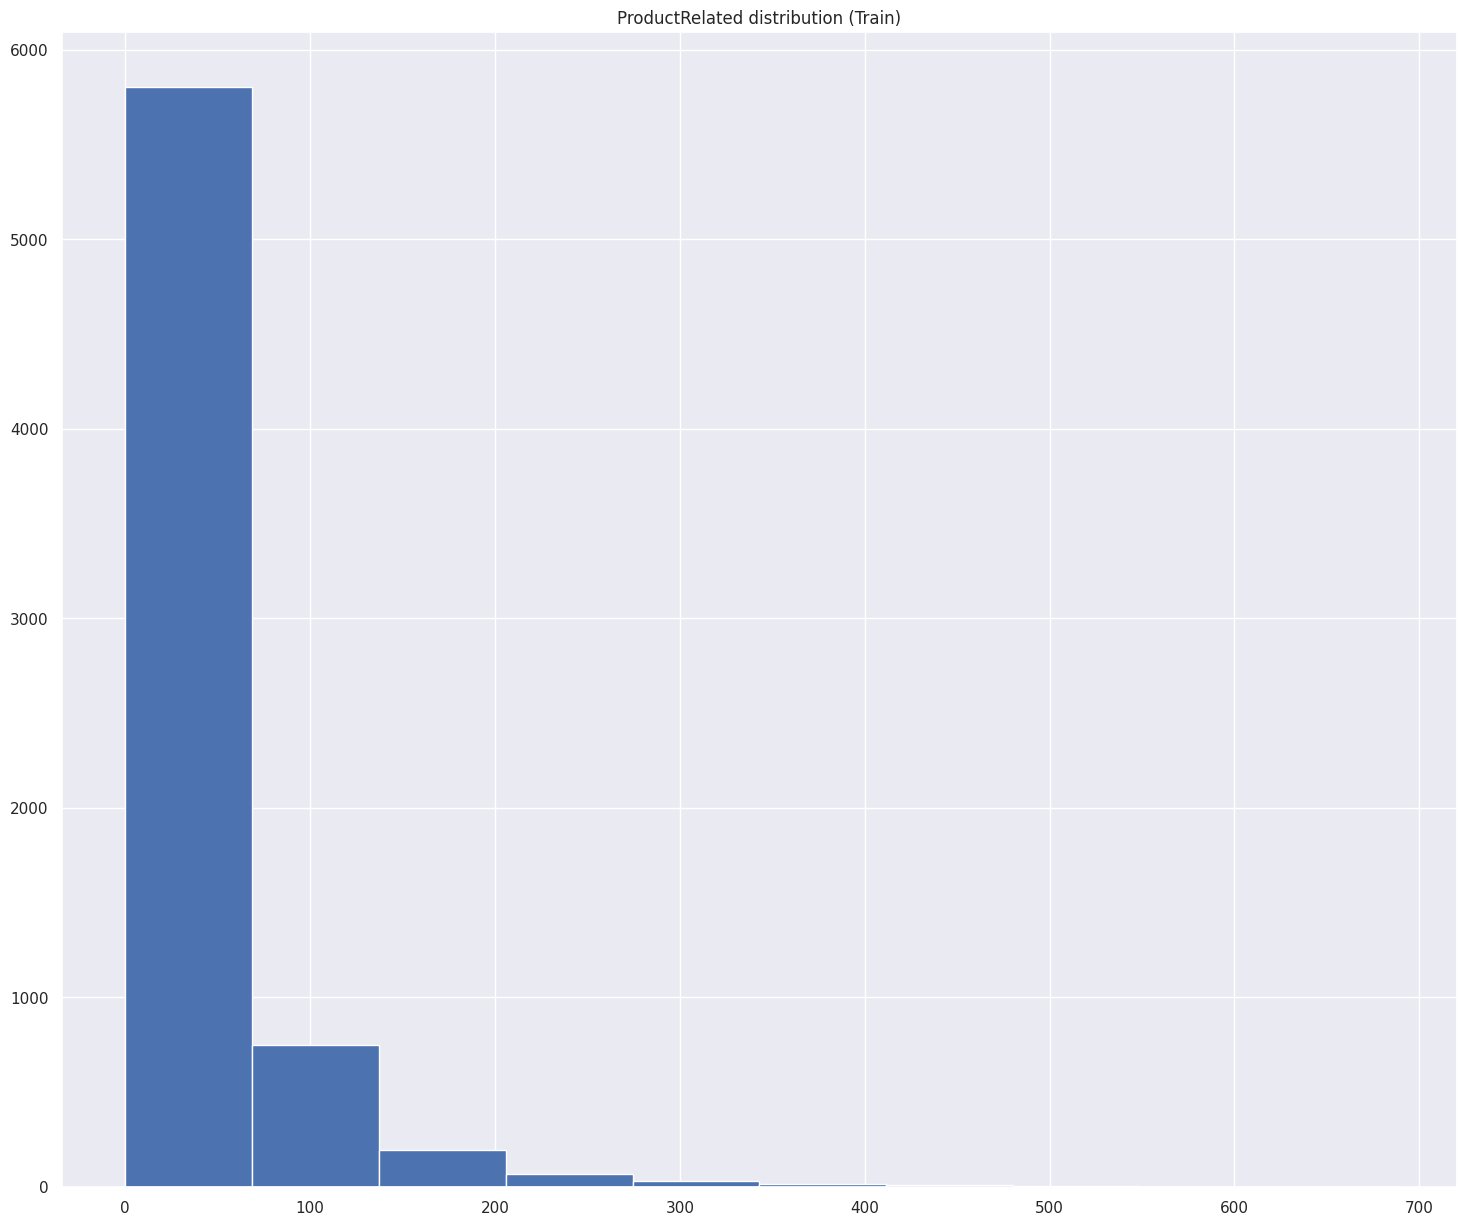

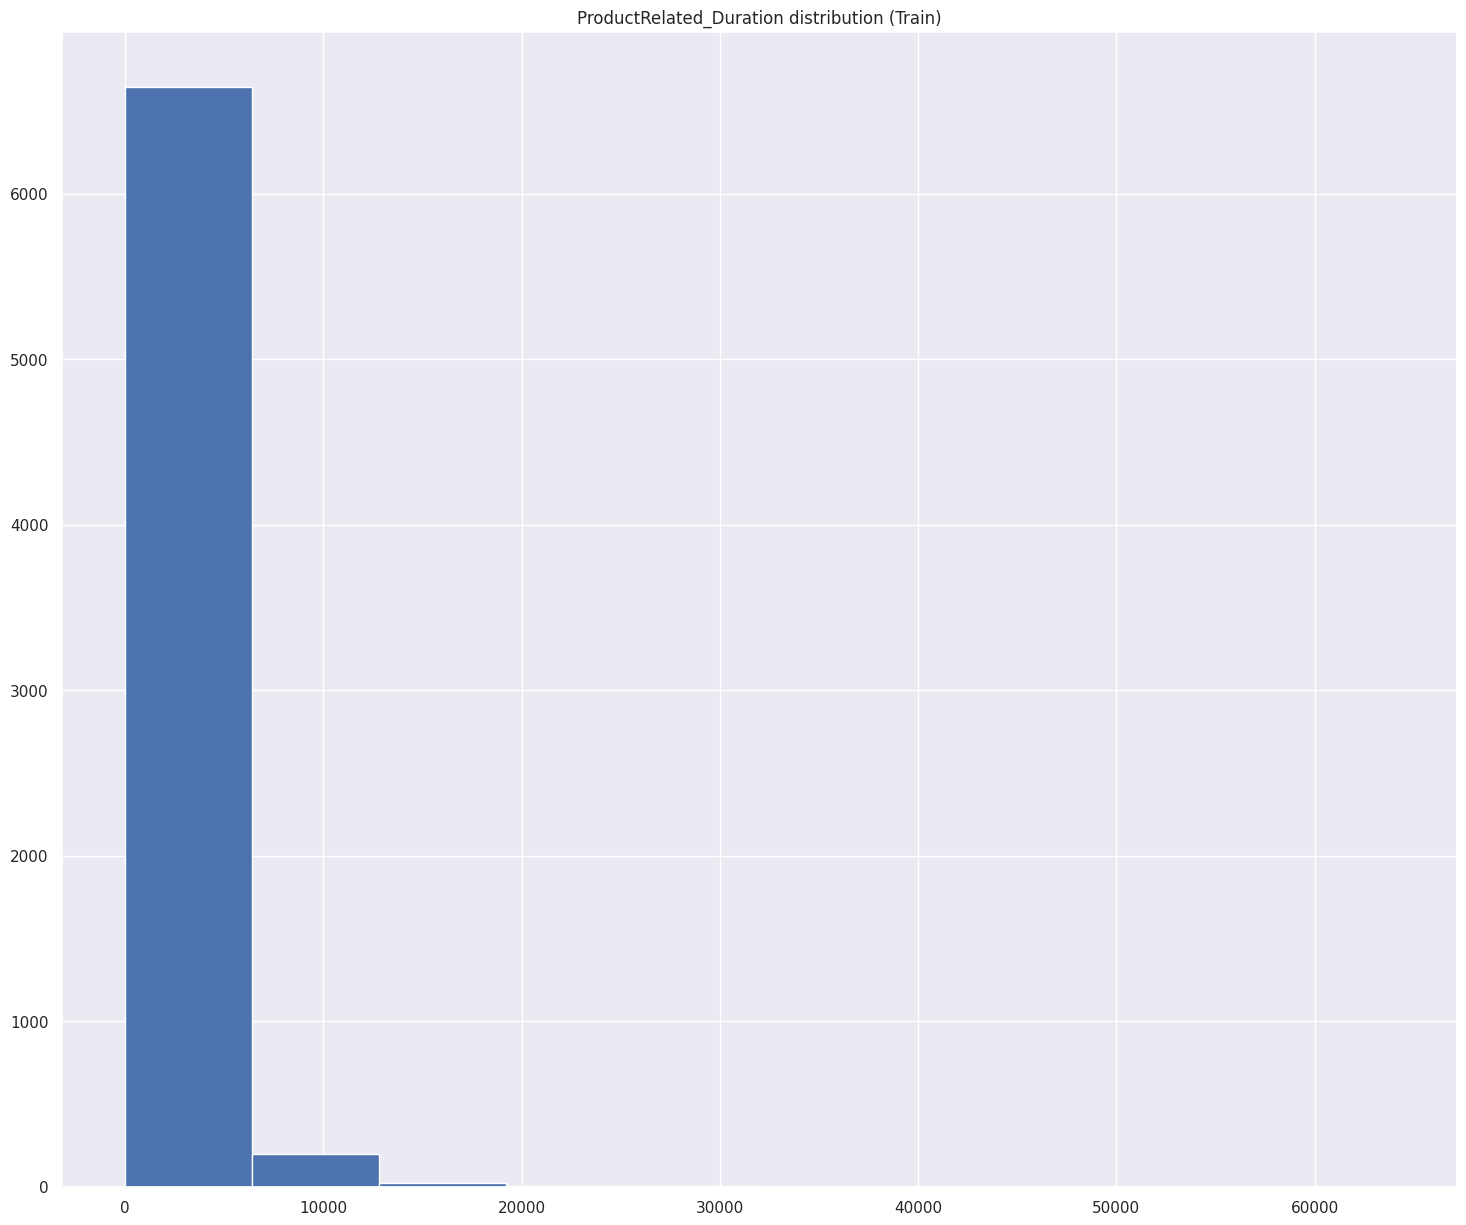

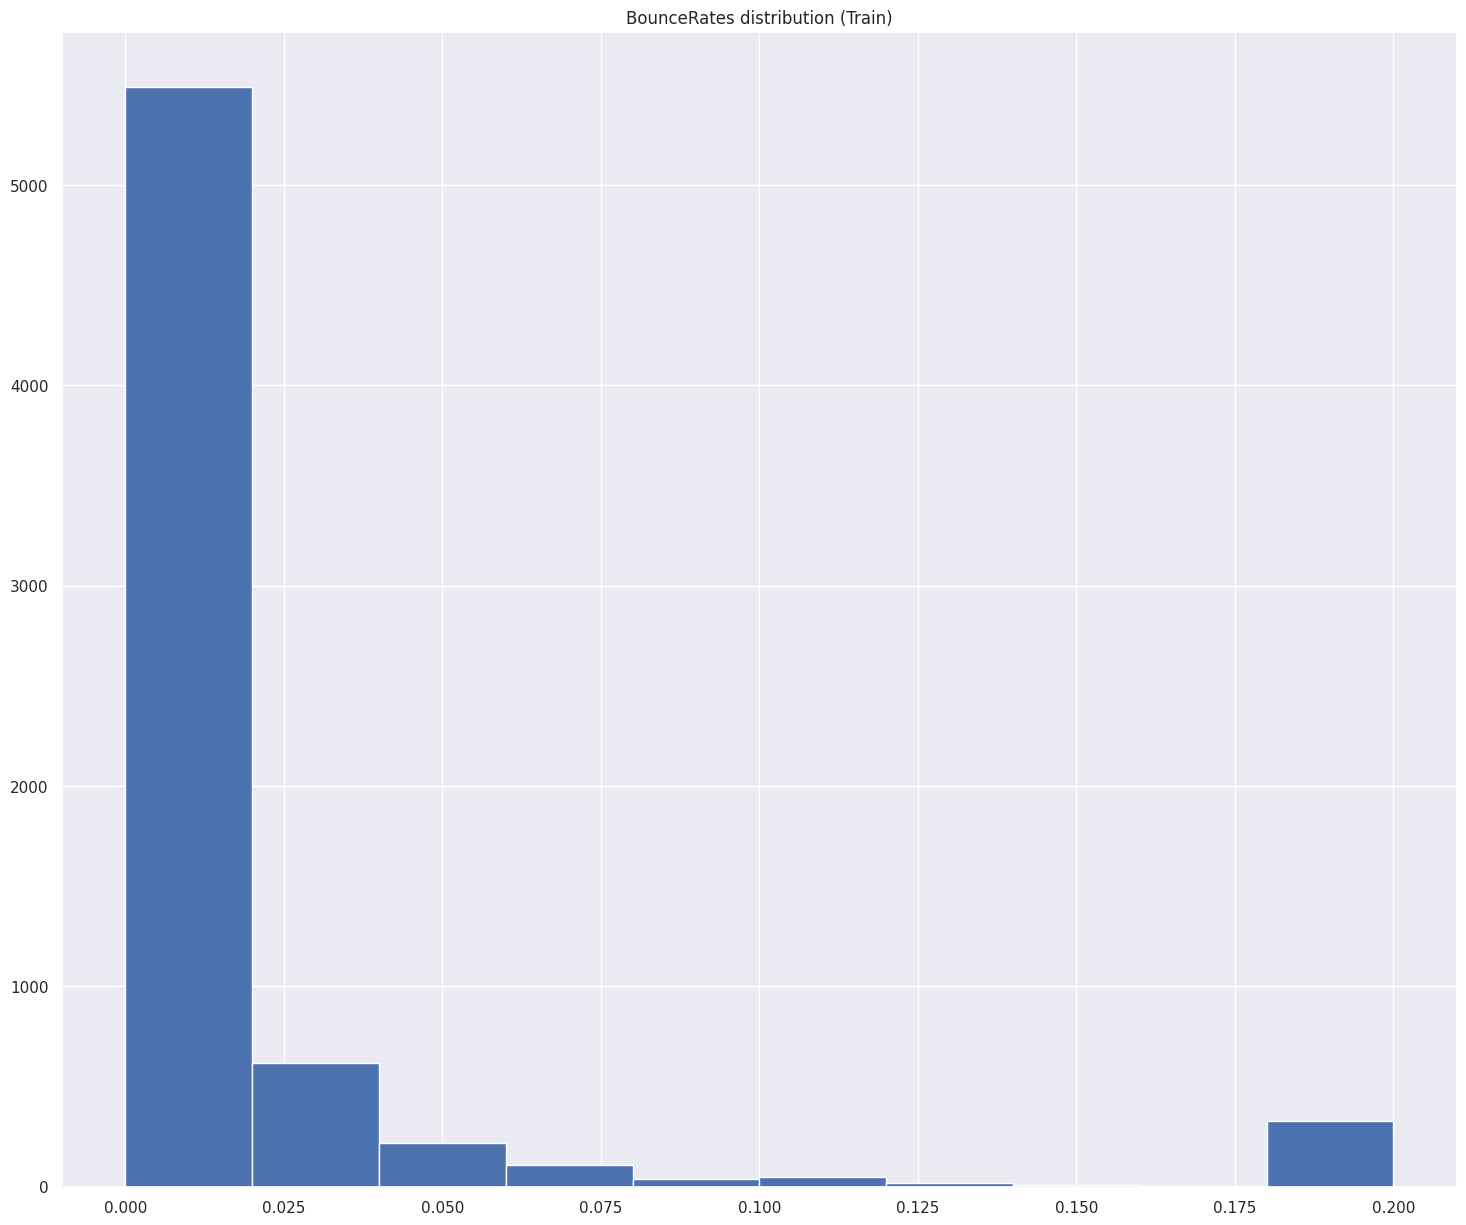

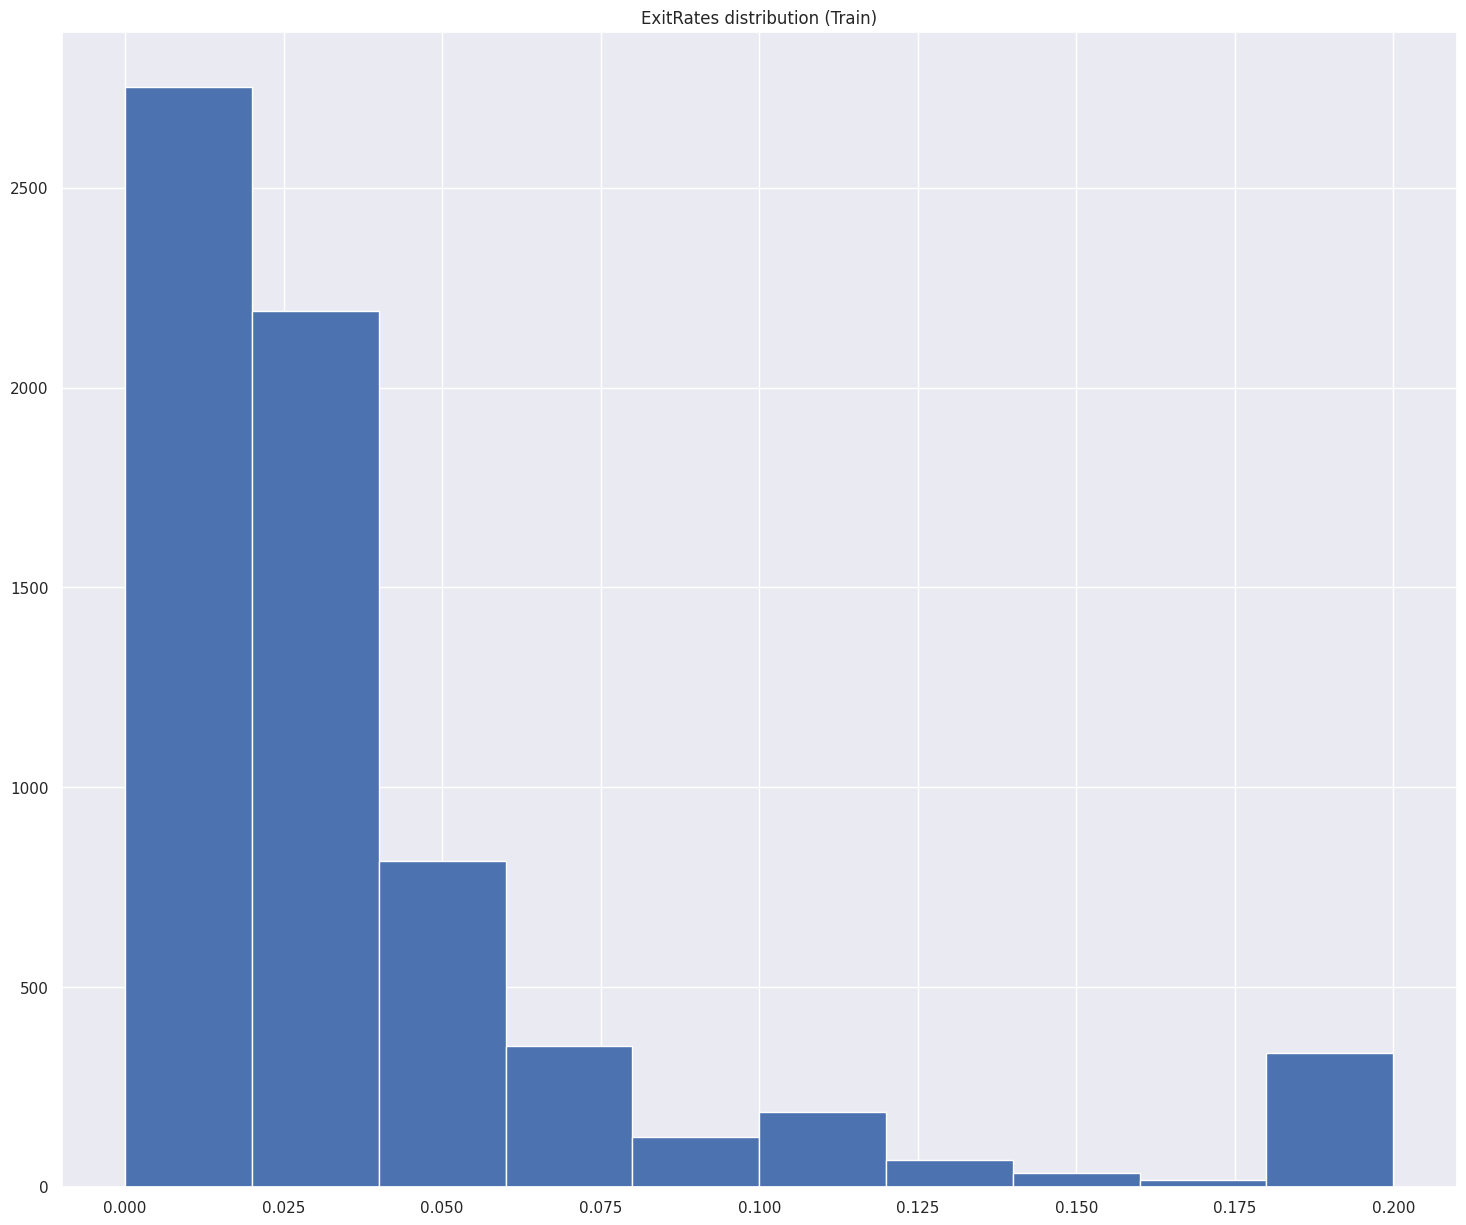

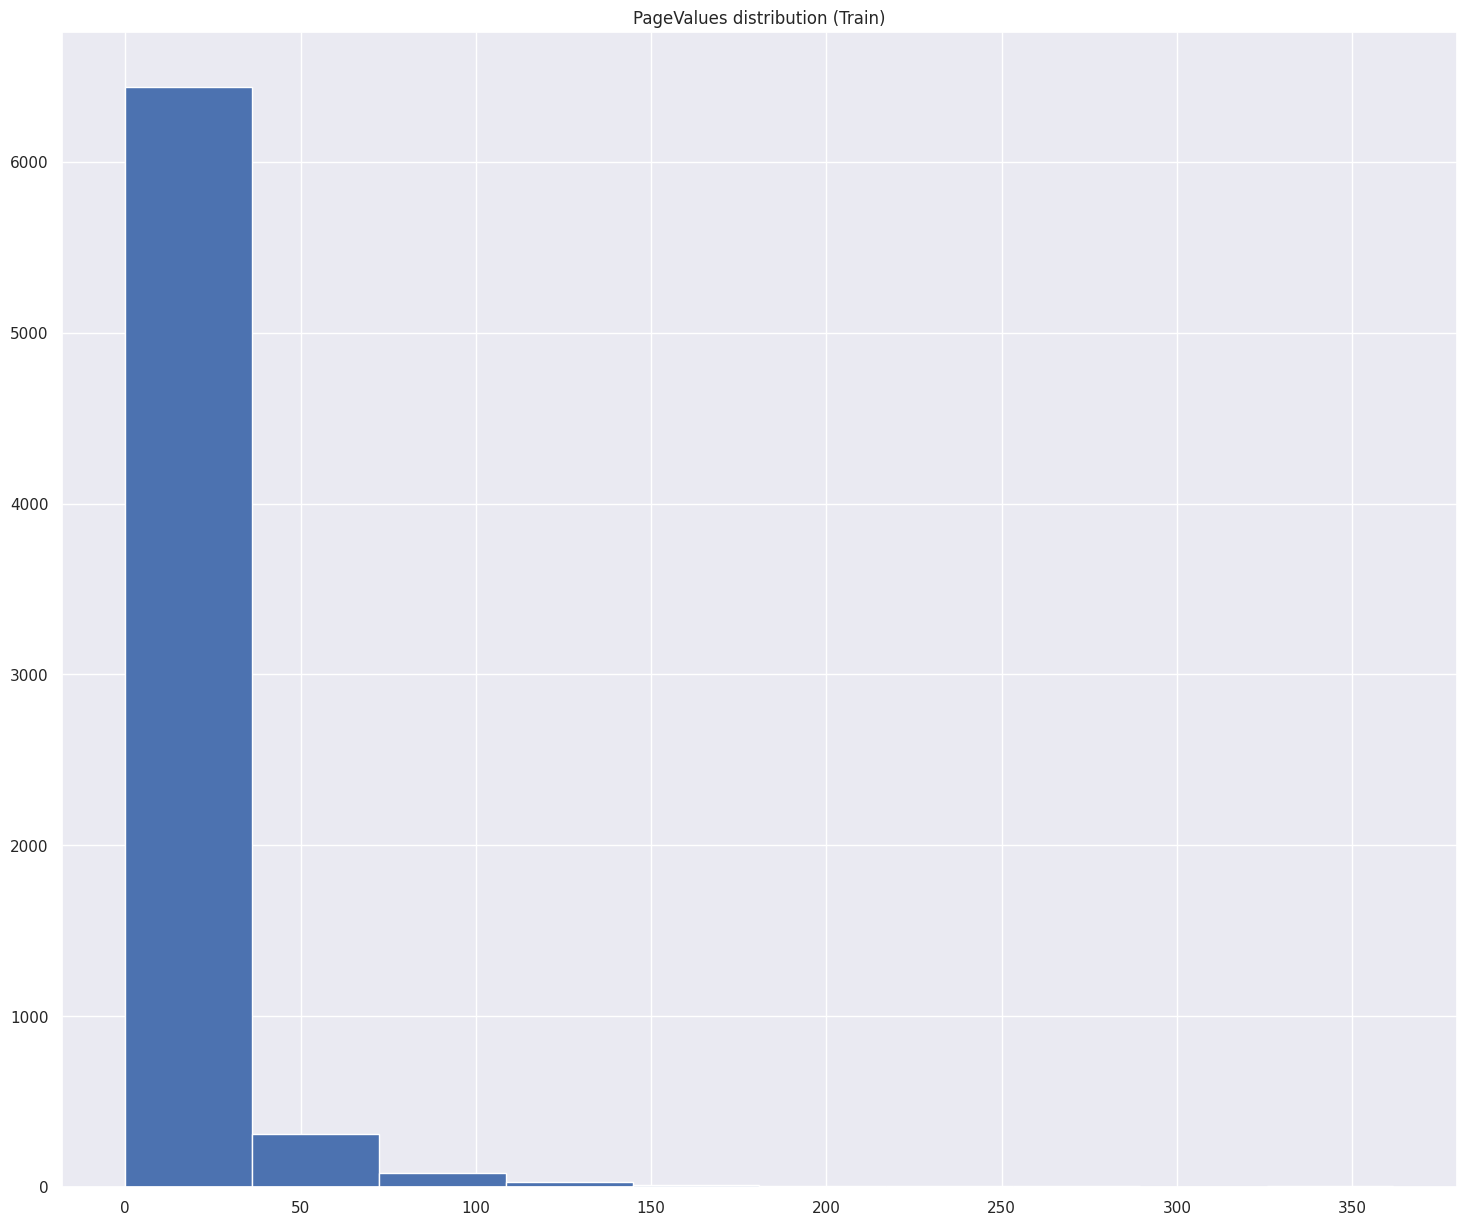

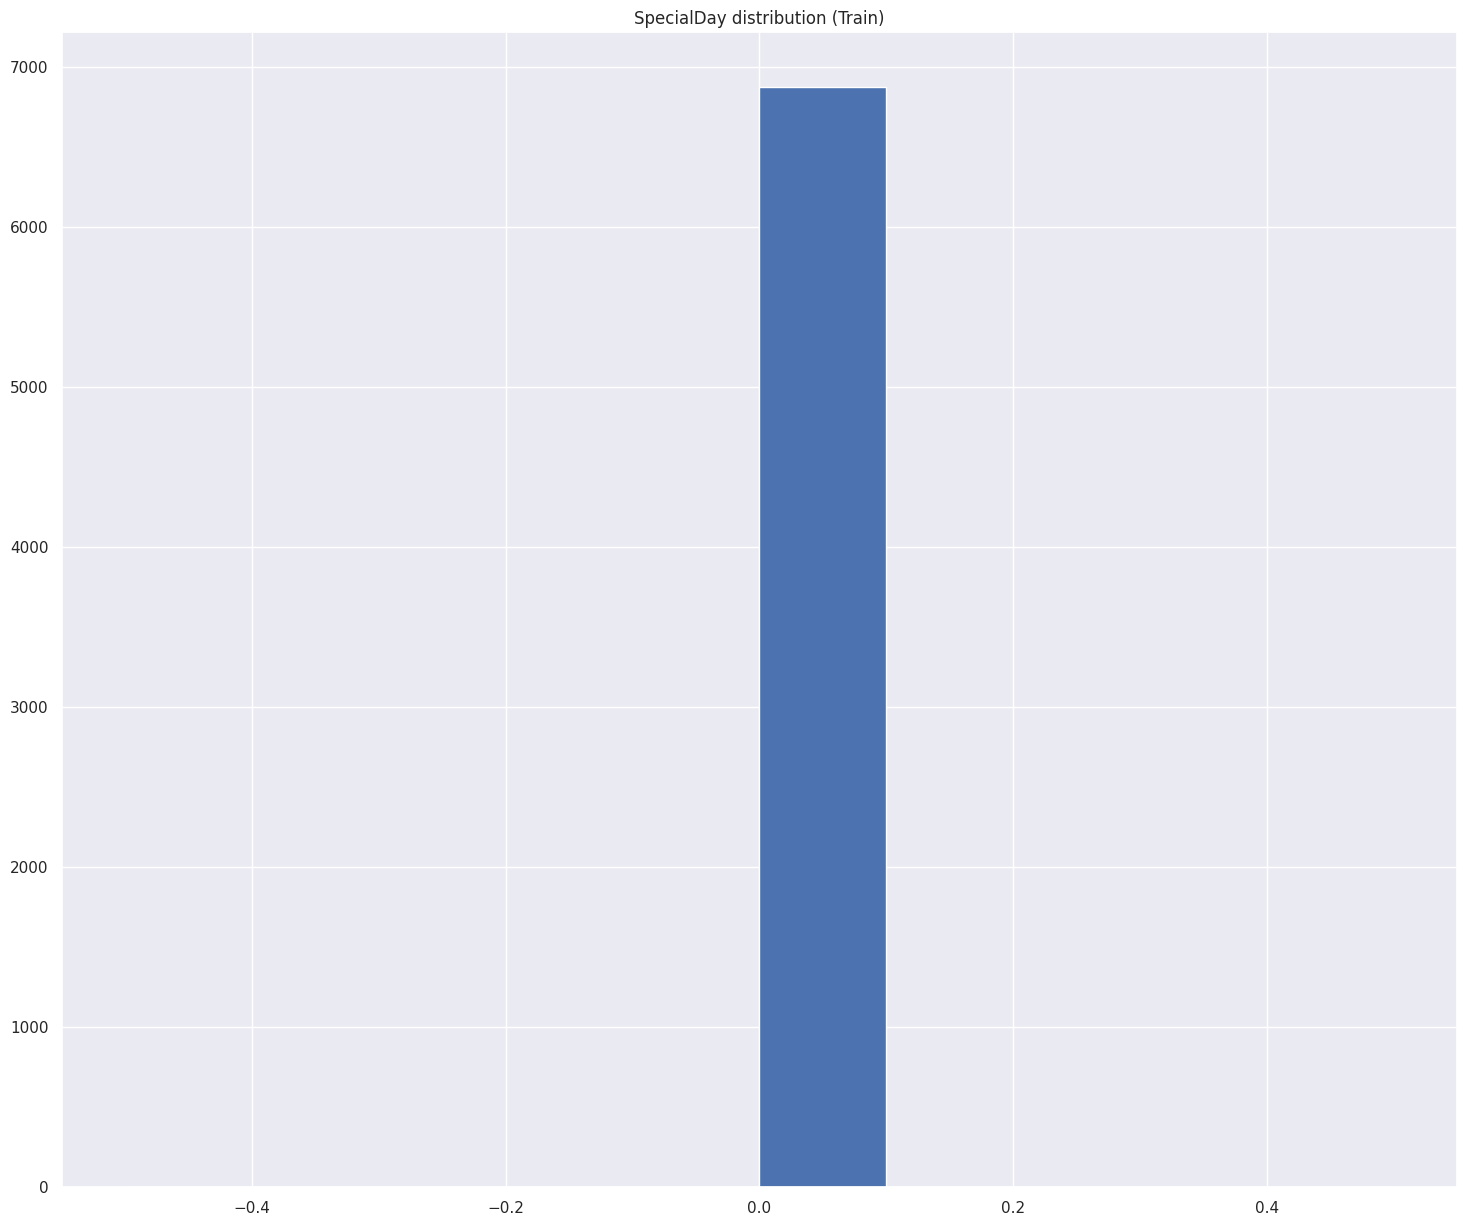

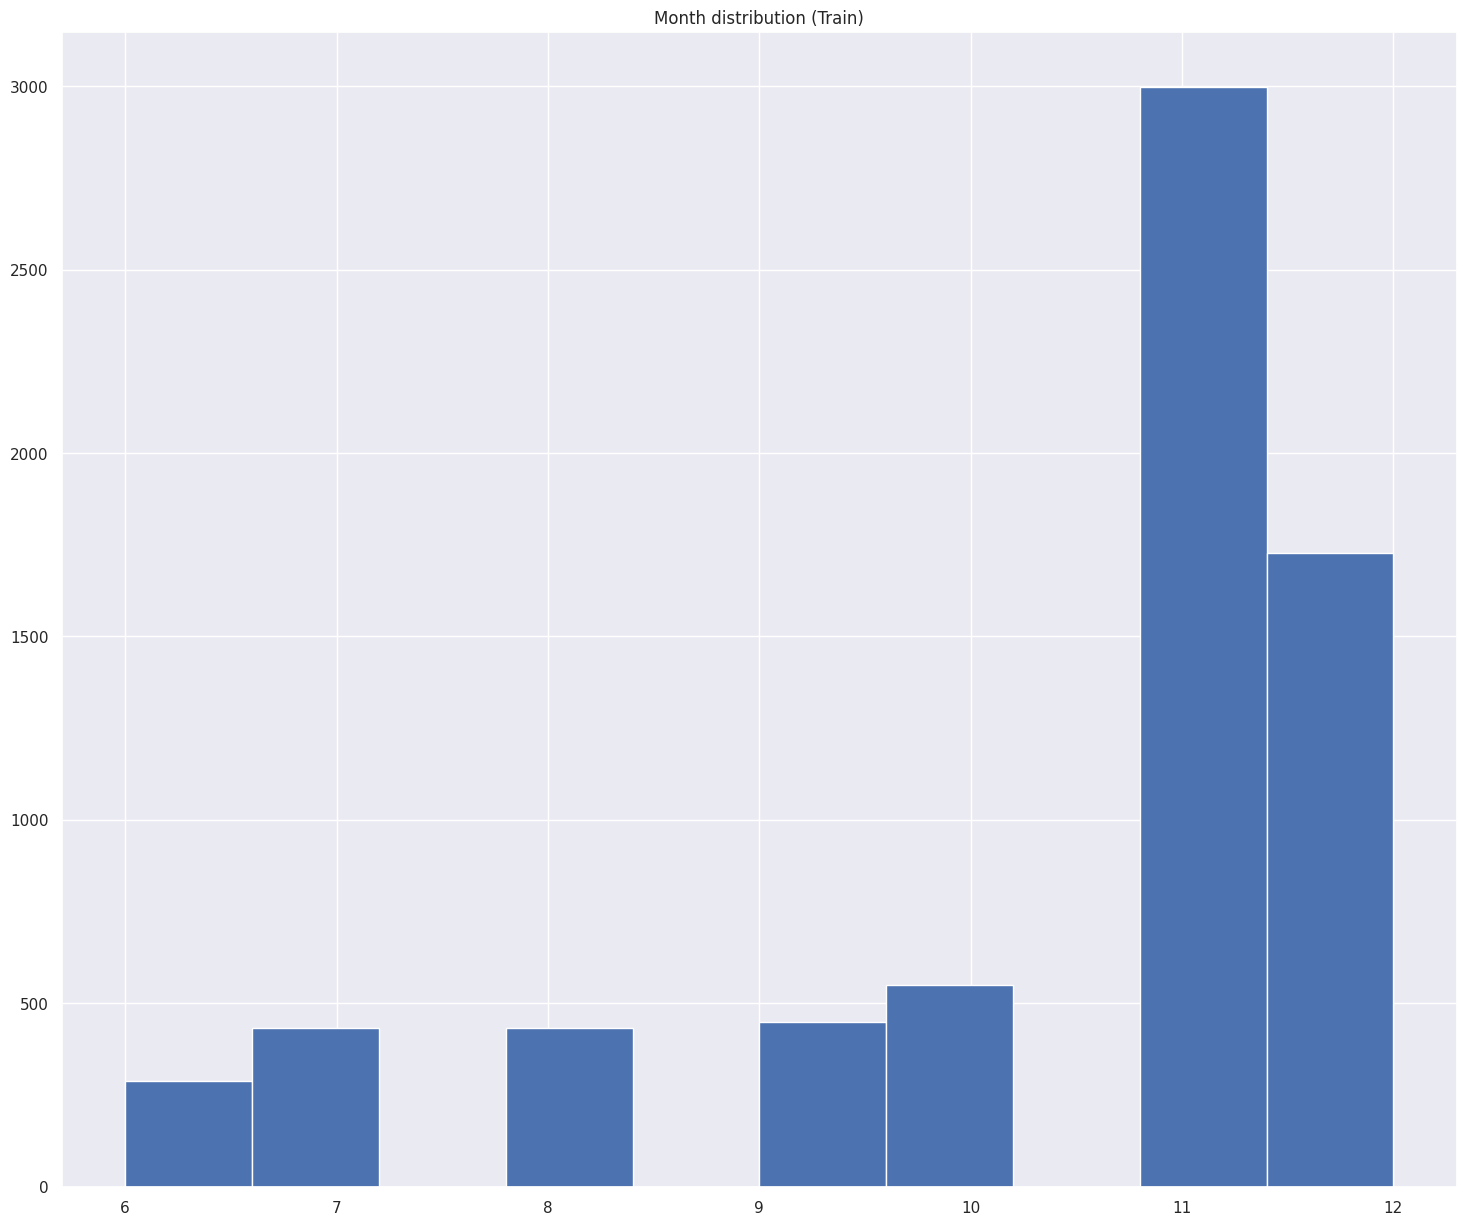

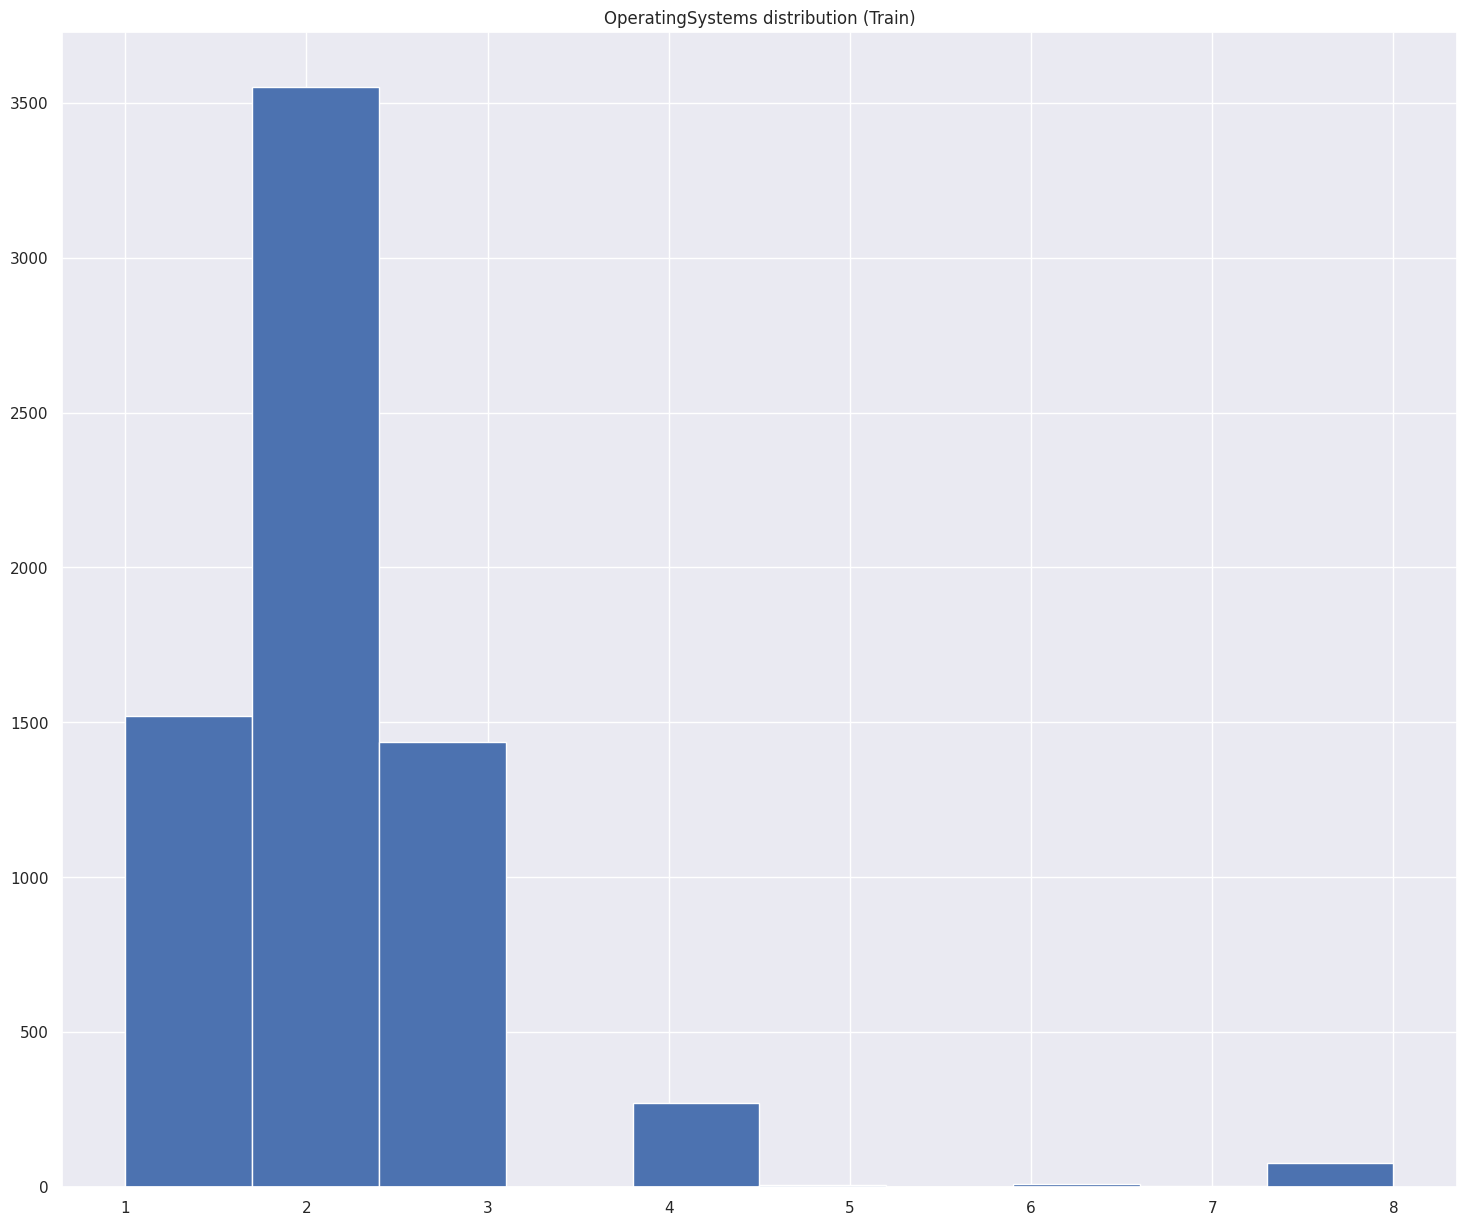

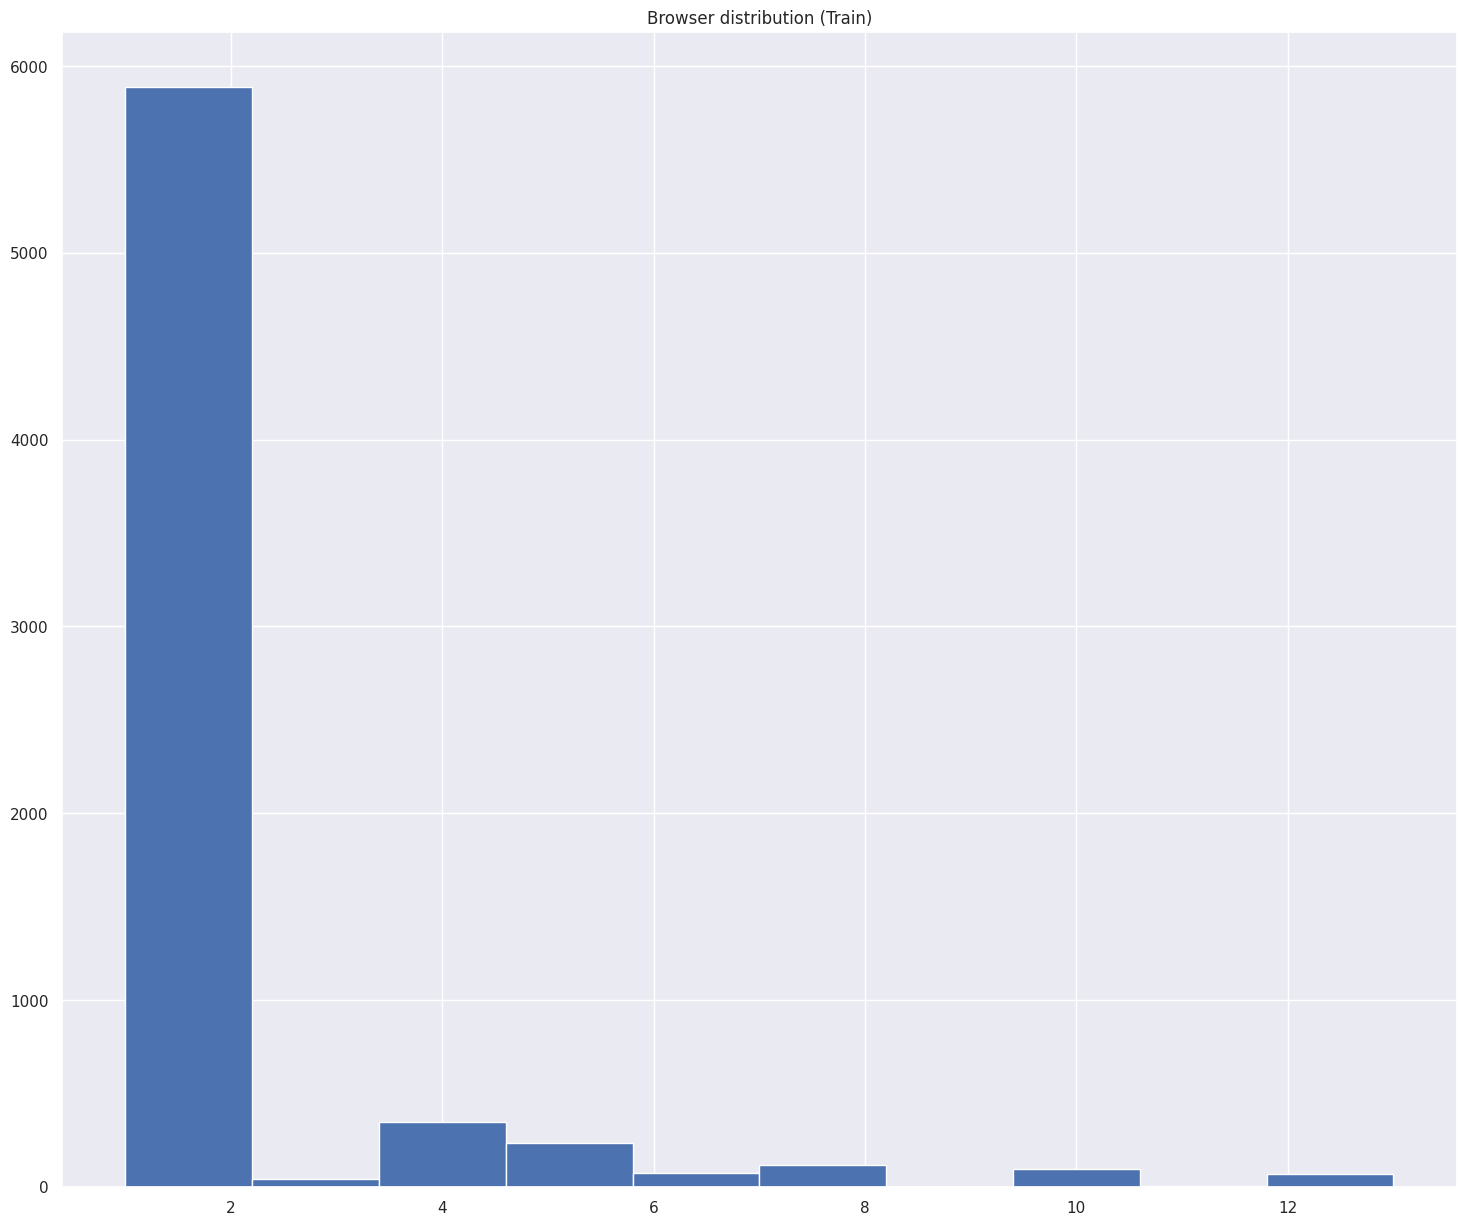

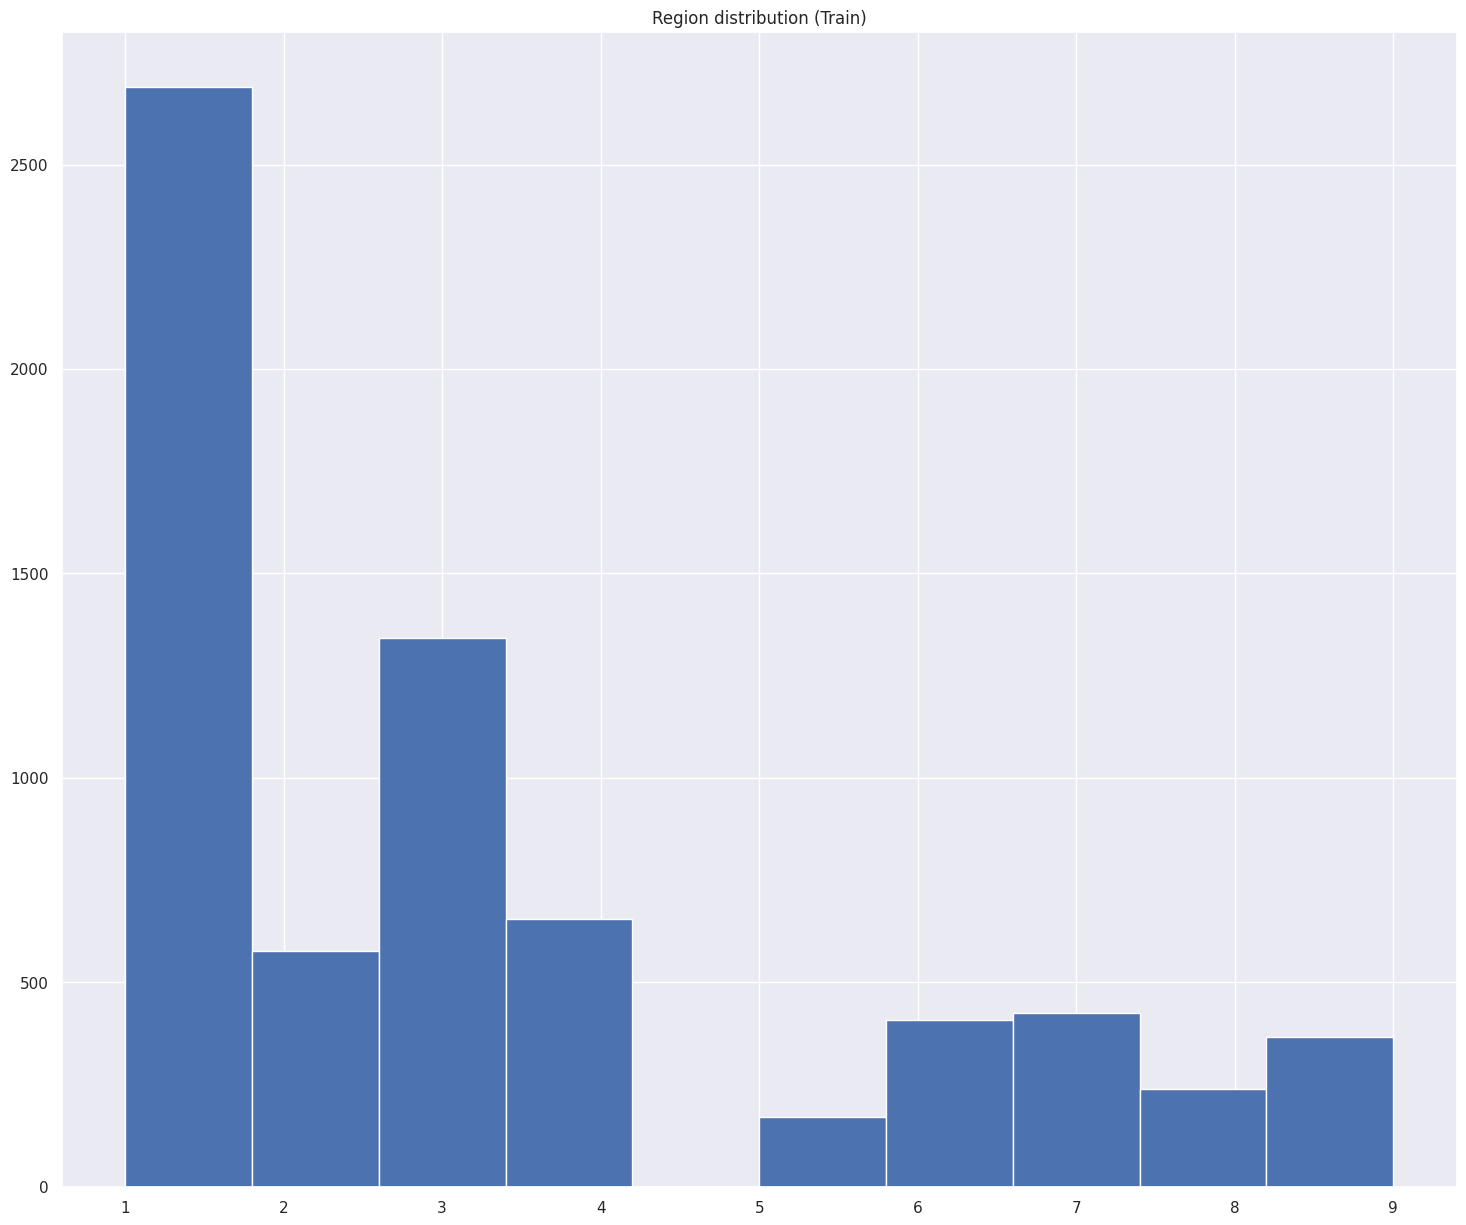

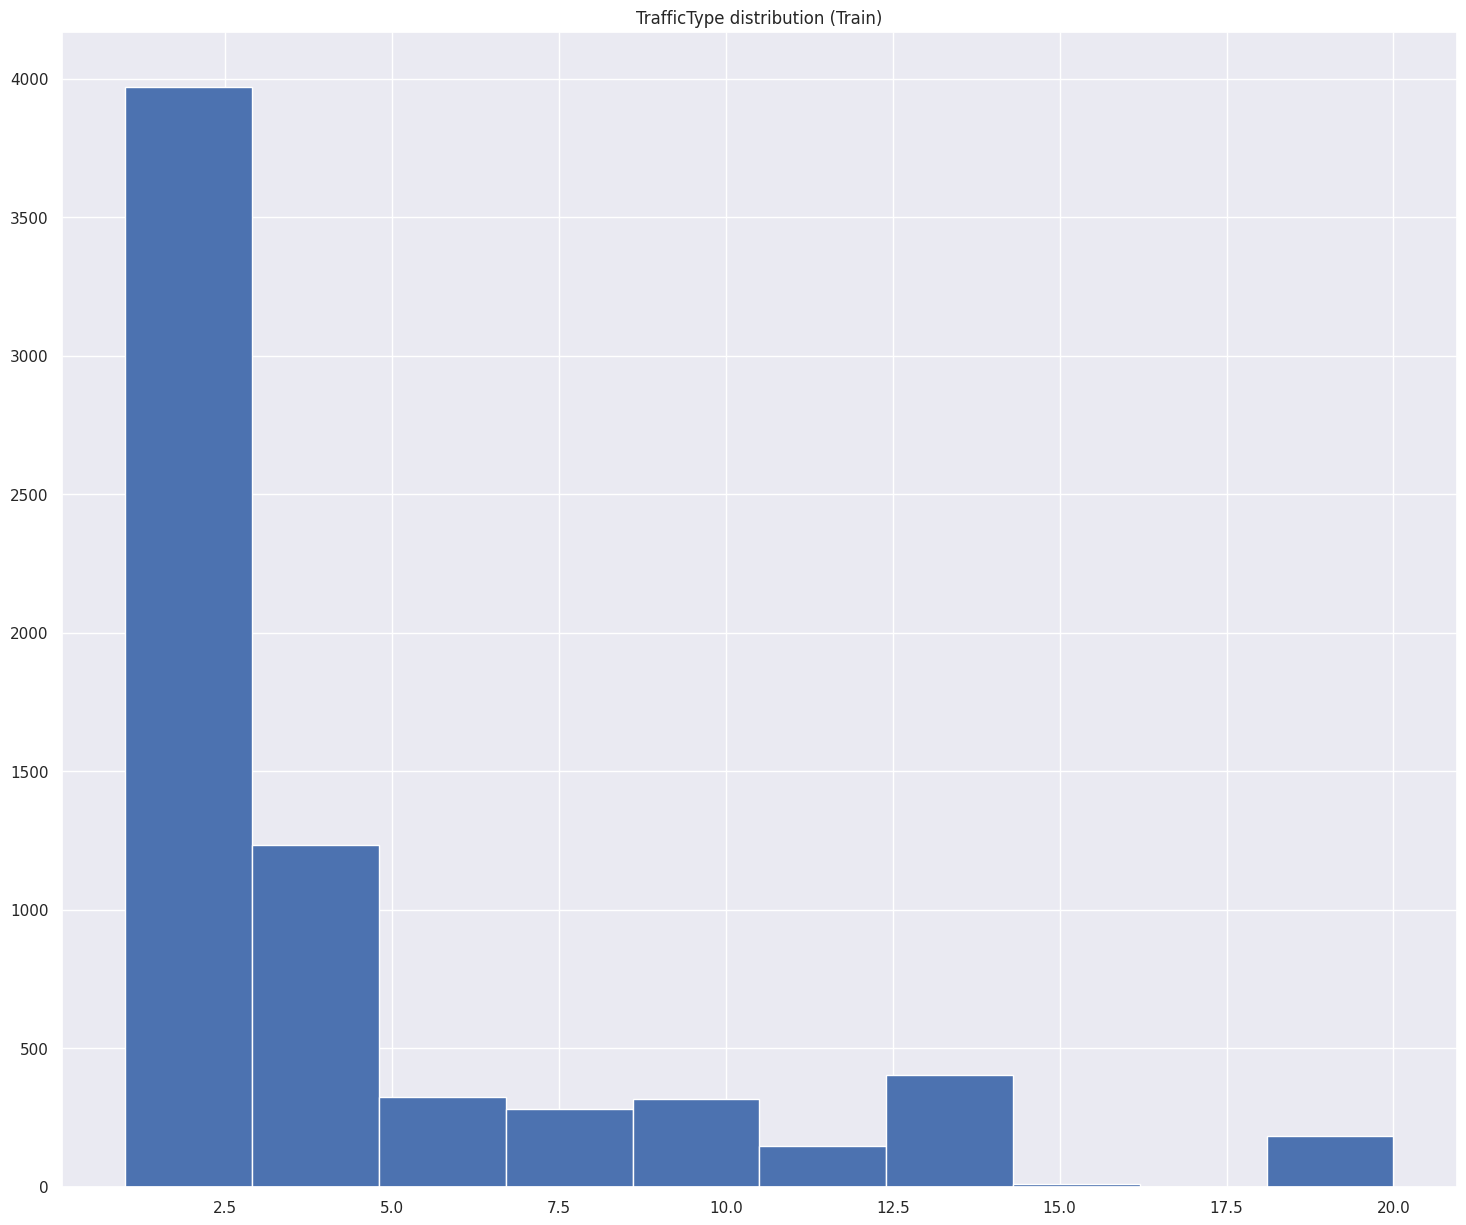

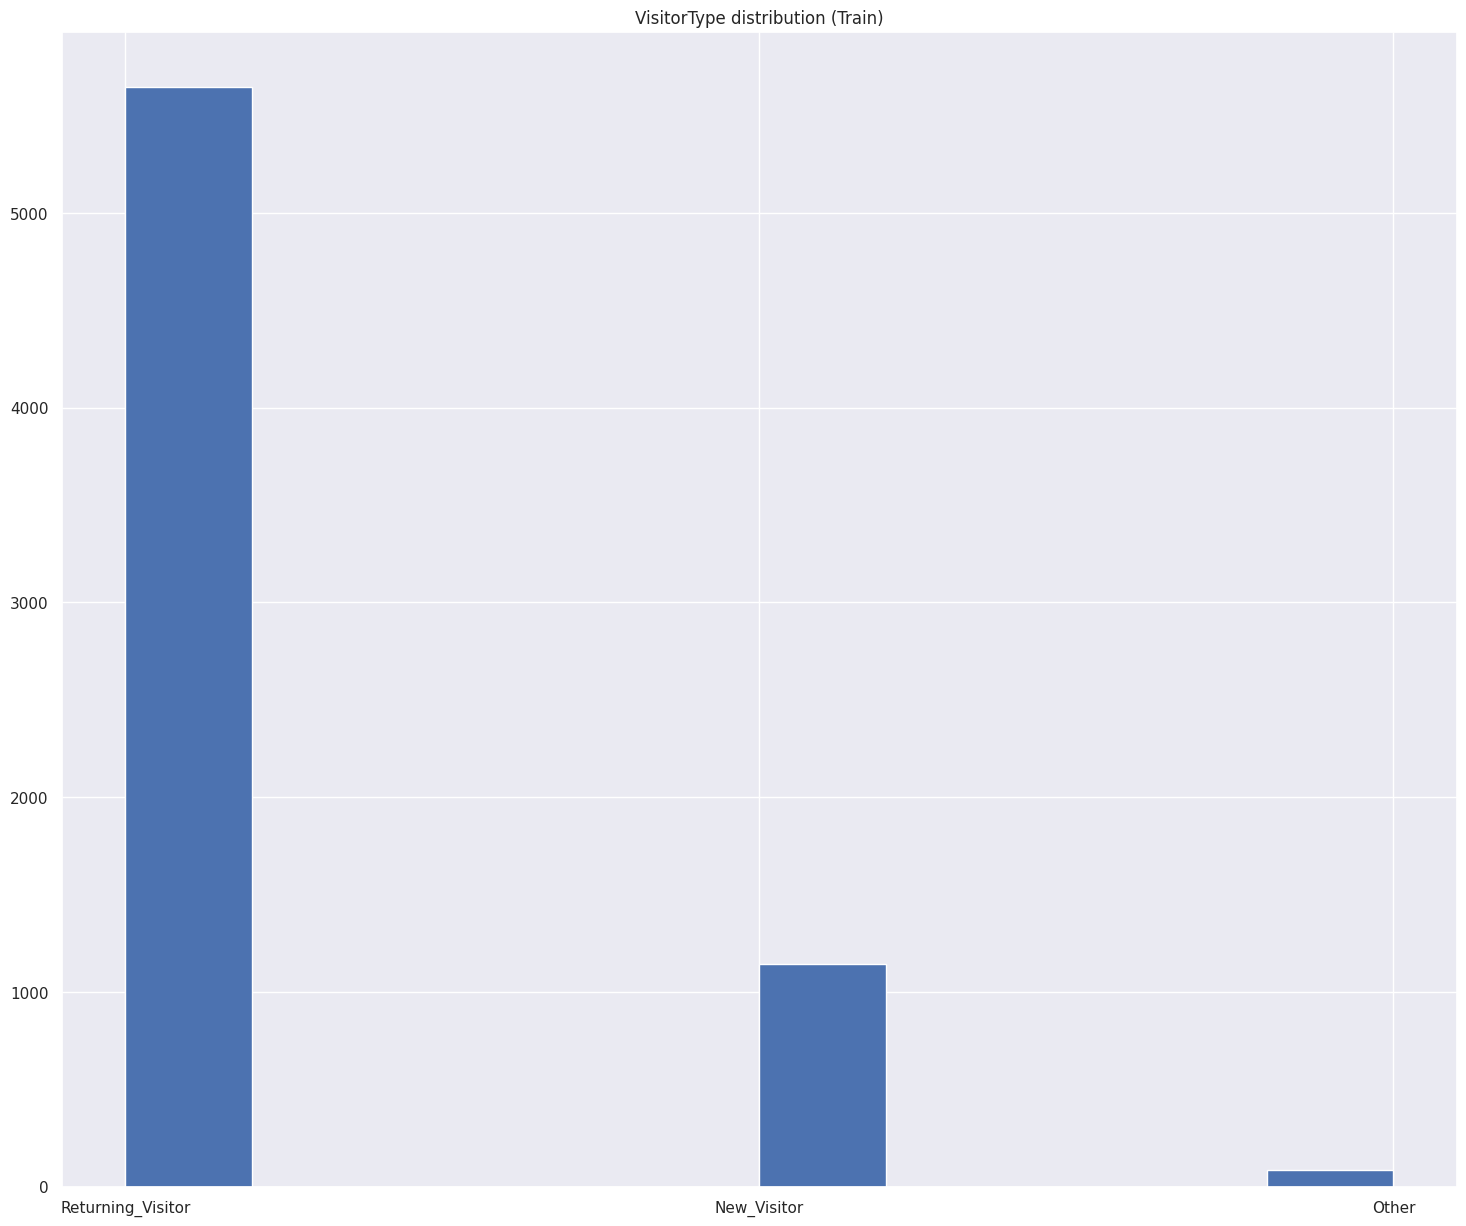

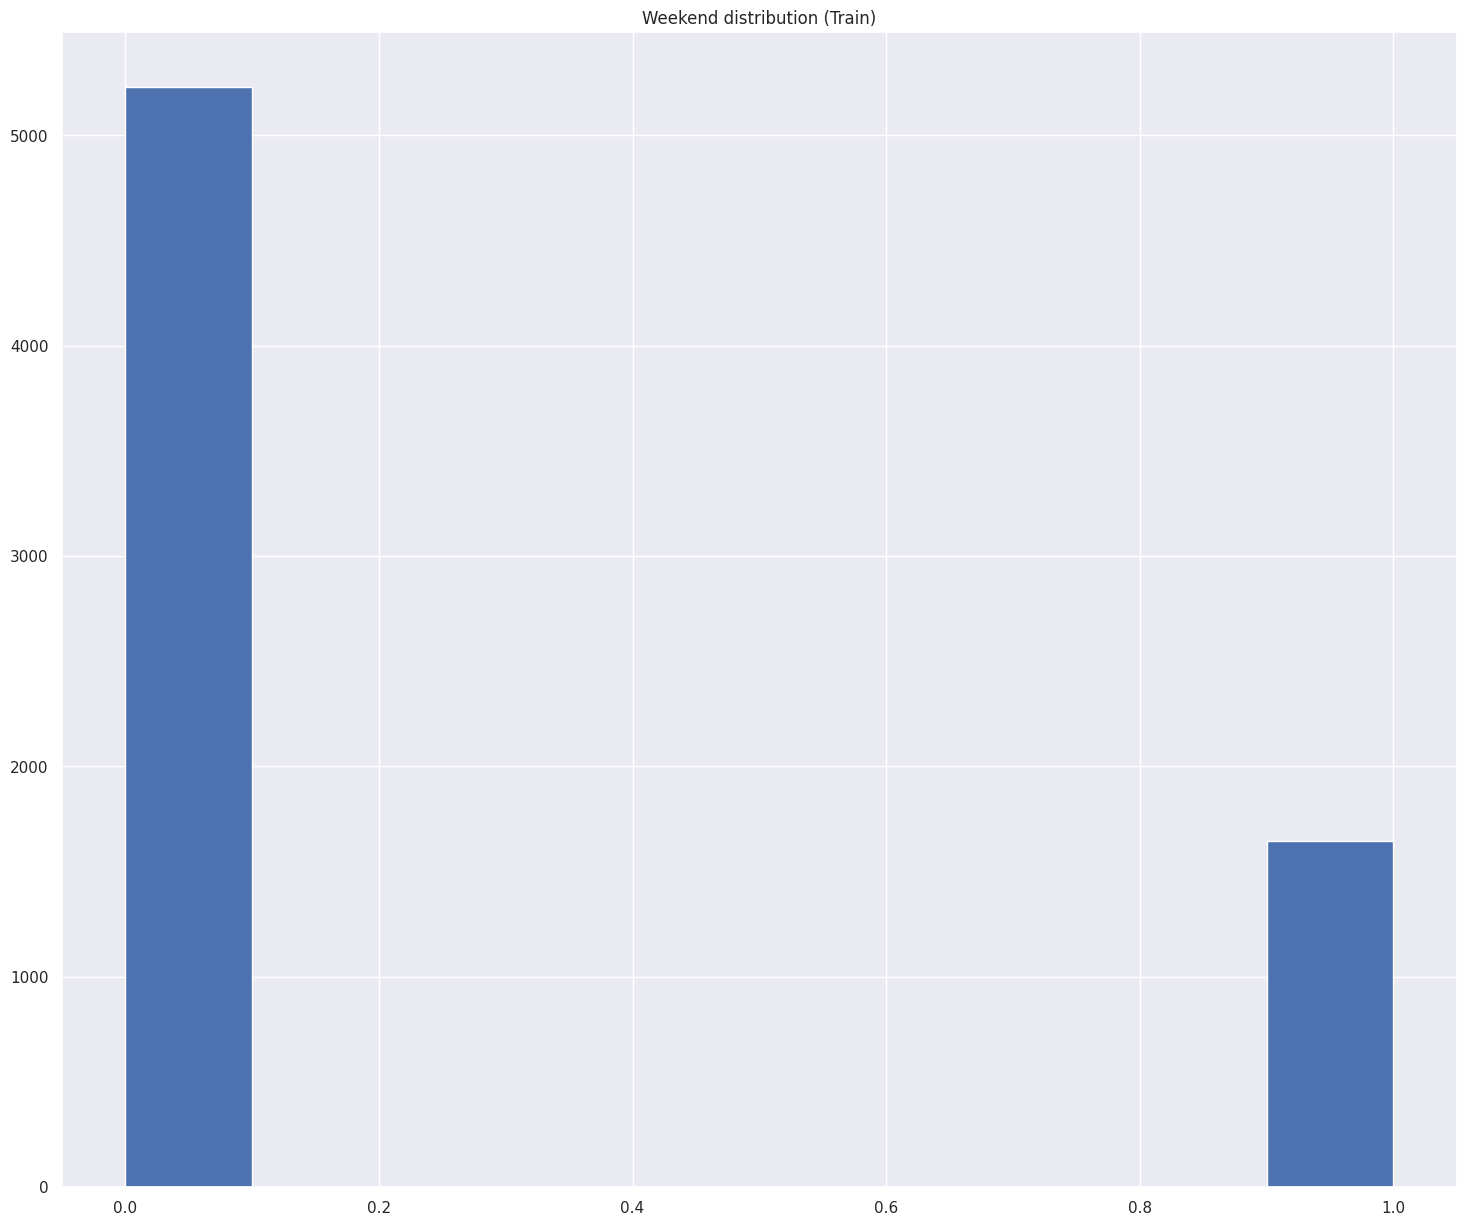

In [139]:

#--- generate plots to inspect the distribution of feature values with associated Revenue
kbln_showTest = False
kstrPlotType = "Test"
pdf_plot = pdf_xTest
aryPlotCols = aryColsTrain

if (not kbln_showTest):
  kstrPlotType = "Train"
  pdf_plot = pdf_xTrain

for colName in aryPlotCols:
  plt.hist(pdf_plot[colName])
  plt.title(f'{colName} distribution ({kstrPlotType})')
  plt.show()


#### Findings
- the train dataset has over 3x the records as the test dataset; ie 6875 vs 2091
- this means only that Jun-Dec sees 3x the frequency of revenue as Feb-Mar 
- the train dataset sees ~20% of its records flagged with target Revenue
- the test dataset sees ~10% of its records flagged with target Revenue


#### Univariate Analysis (Train)
- Administrative:       most sessions visit between 0-10 pages;  duration is 0-500 secs
- Informational:        most sessions visit between 0-4 pages;  duration is 0-500 secs
- Product Related:      most sessions visit between 0-50 pages; duration is 0-5000 secs
- BounceRates:          the majority of bounce rates are less than 5%
- ExitRates:            the majority of exit rates are less than 7.5%
- PageValues:           the majority of PageValues are less than 50
- SpecialDay:           there are no Special Days in the training set.  Remove.
- Month:                the majority of traffic occurs during Nov-Dec.  
                        Note, we know that May is a very busy month and it is excluded from test/train
- OperatingSystems:     OS types 1-3 hold the clear majority, with type 2 being the clear lead (>3500)
- Browser:              browser type 2 holds the clear majority
- Region:               regions 1 and 3 hold the majority of visits
- TrafficType:          majority of traffic (>4000 total) is of type < 5
- Weekend:              majority of visits are during weekdays
- VisitorType:          majority of visitors are returning (>5000) with a sizable number of new visitors (>1000)



#### Univariate Analysis (Test)
- assume the same as Train, unless there are specific comments here
- Administrative:       most sessions visit between 0-10 pages;  duration is 0-1800 secs
- Informational:        most sessions visit between 0-4 pages;  duration is 0-2000 secs
- Product Related:      most sessions visit between 0-50 pages; duration is 0-1600 secs
- BounceRates:          the majority of bounce rates are less than 5%;  there are ~200 instances of ~20% bounce rate
- ExitRates:            the majority of exit rates are less than 10%;  there are ~200 instances of ~20% exit rate
- SpecialDay:           there are are miniscule number of Special Days
- Month:                the majority of traffic occurs during Mar (>1750);  only ~200 records in Feb.  
- Region:               regions 1-4 hold the majority of visits; however regions 6-9 see <200 visits each
- TrafficType:          majority of traffic (>1500 total) is of type <6;  with <200 visits from type 9-10


#### Bi-variate Analysis (Train)

I want to explore the relationship between Revenue generation and:
- ProductRelated
- ProductRelated_Duration
- BounceRates
- ExitRates
- PageValues
- Month
- OperatingSystems
- Browsers
- Region
- TrafficType
- VisitorType
- Weekend

Objectives:
- (repeatability) how can this help for driving similar revenue?
- (green field)  how can this help for driving new revenue in underserved areas/feature attributes?
- (growth) how can this help to increase revenue, and/or the speed of conversion?  

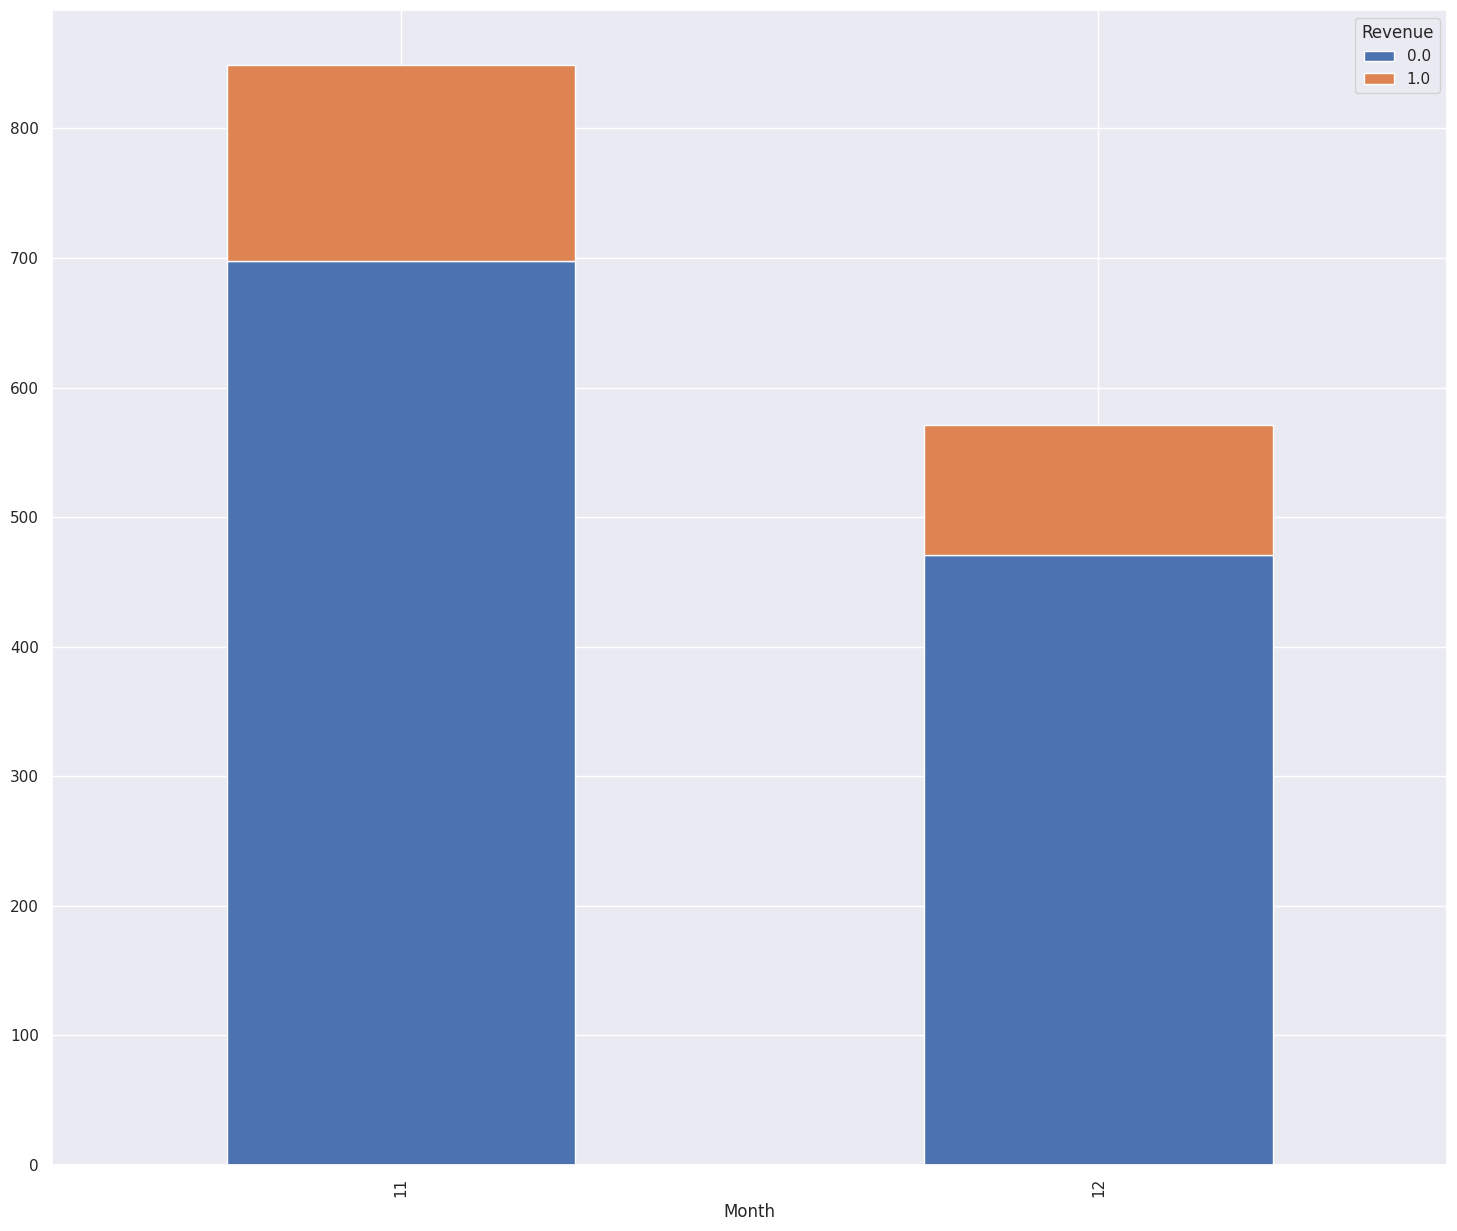

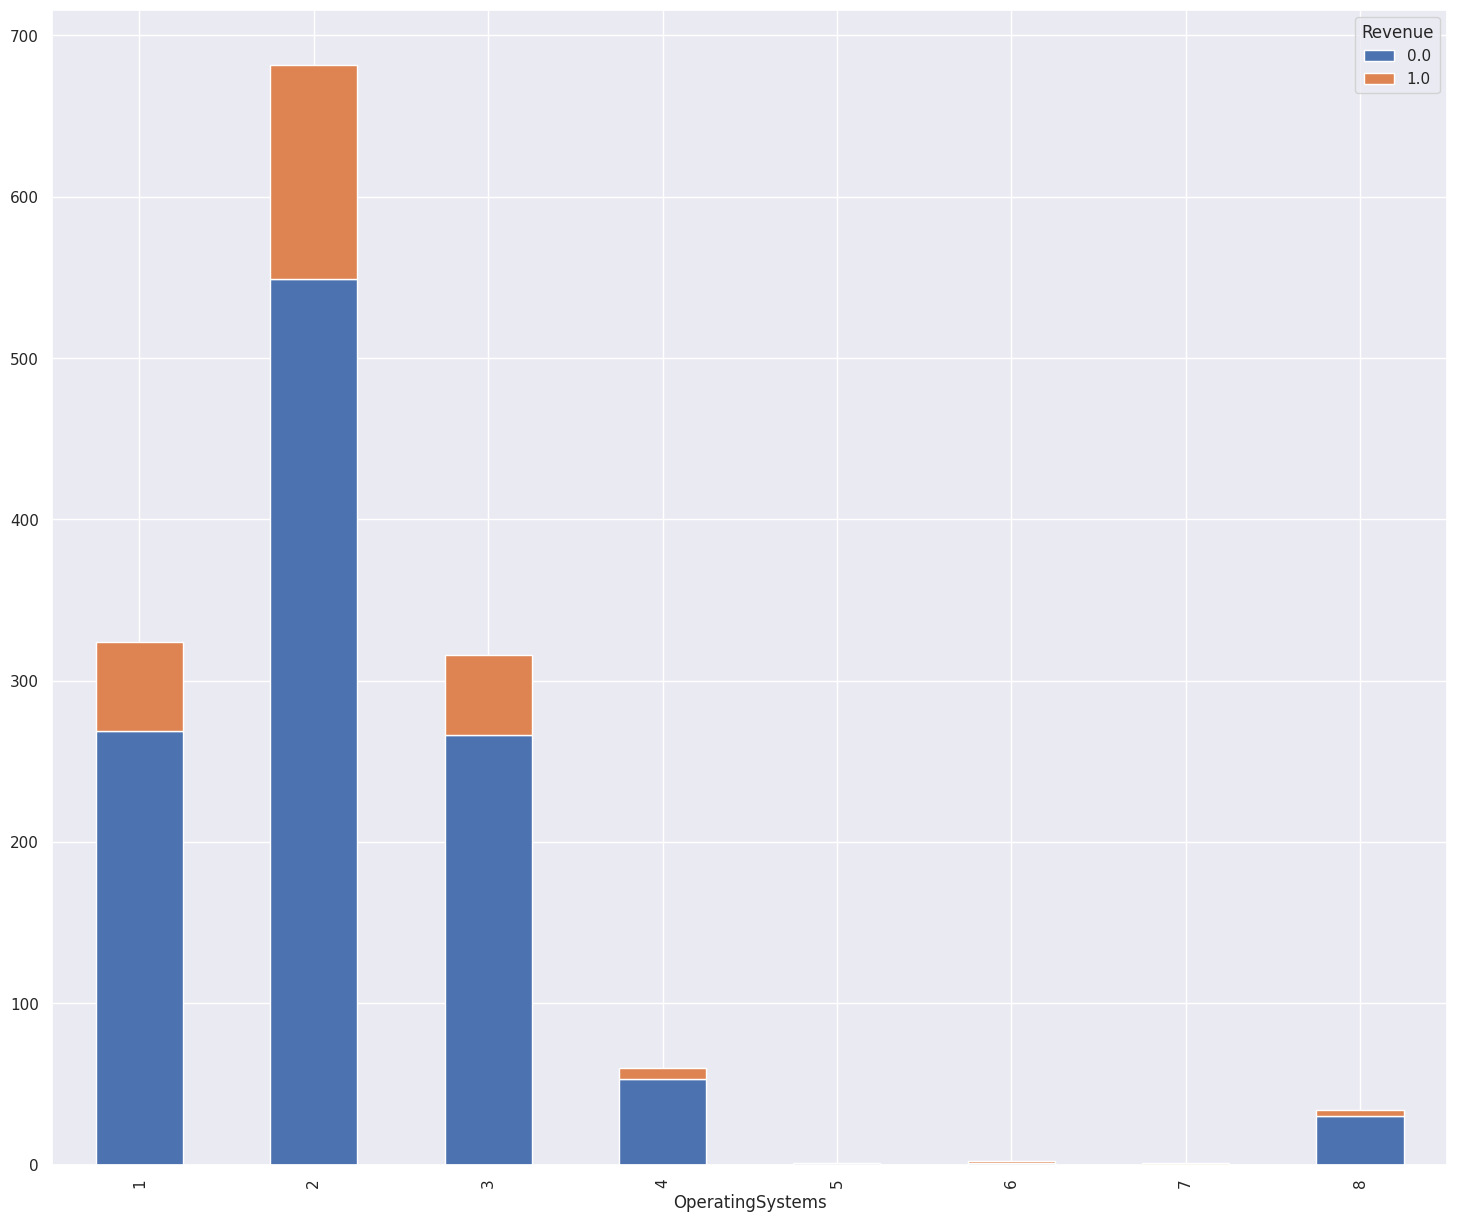

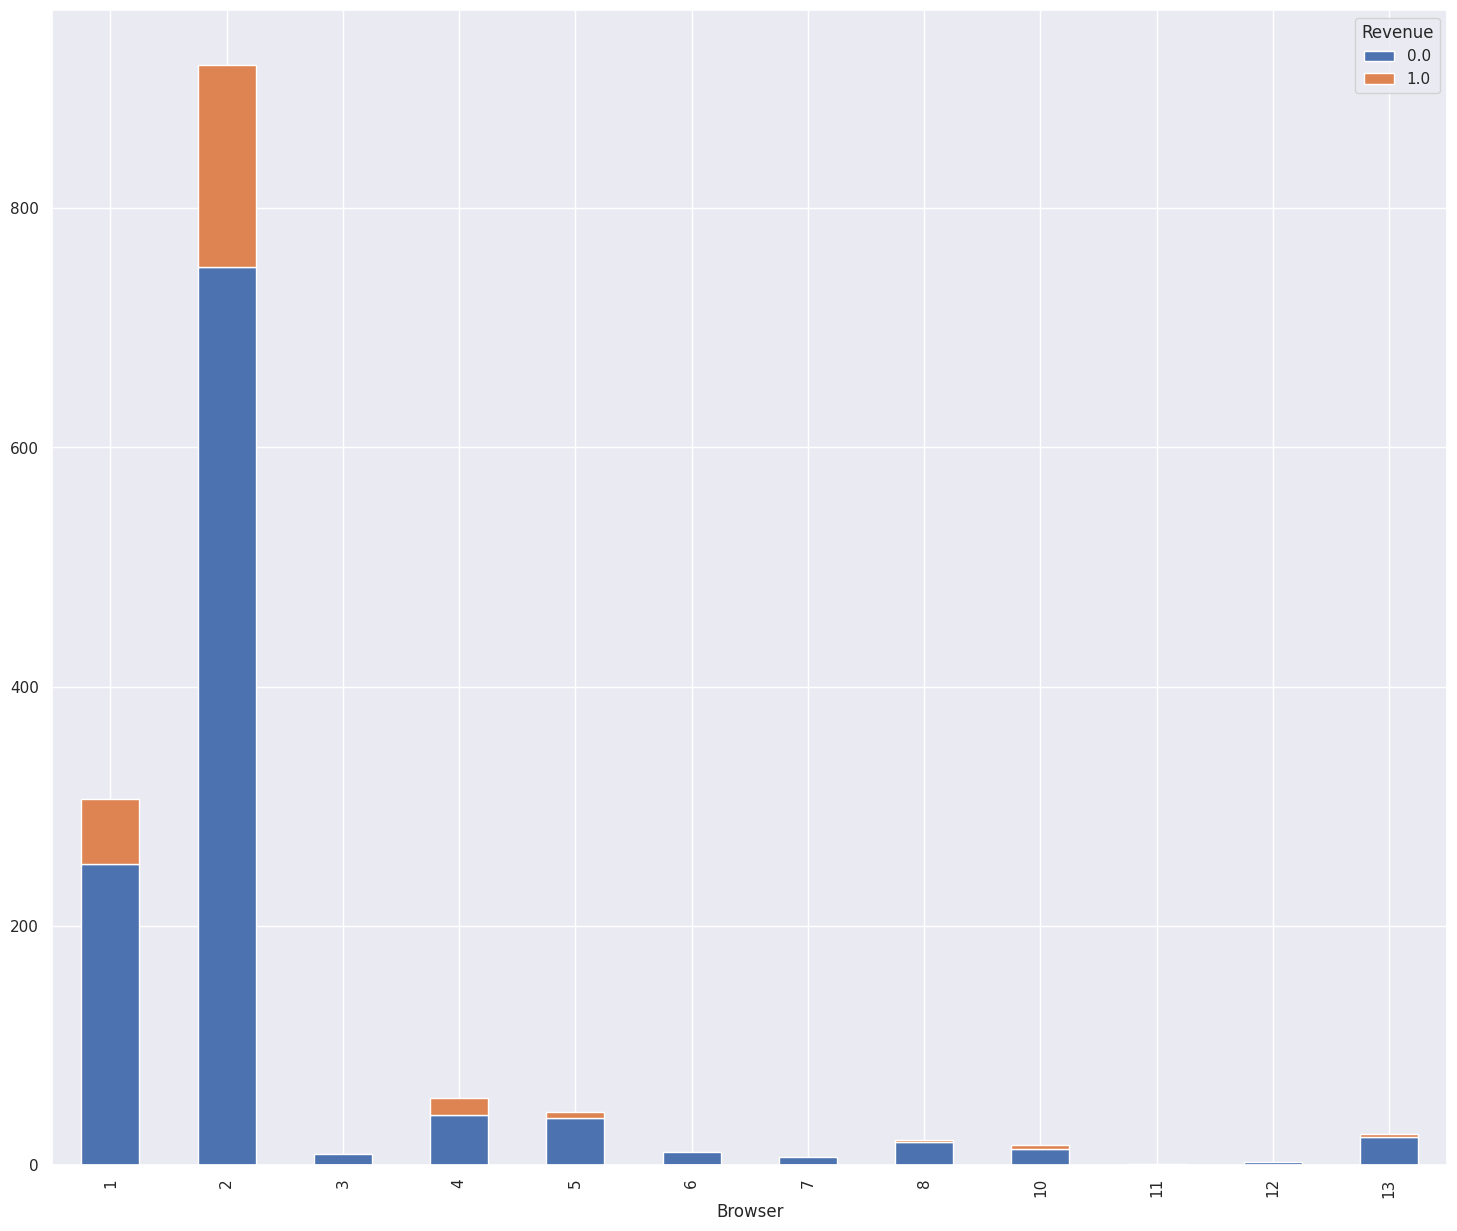

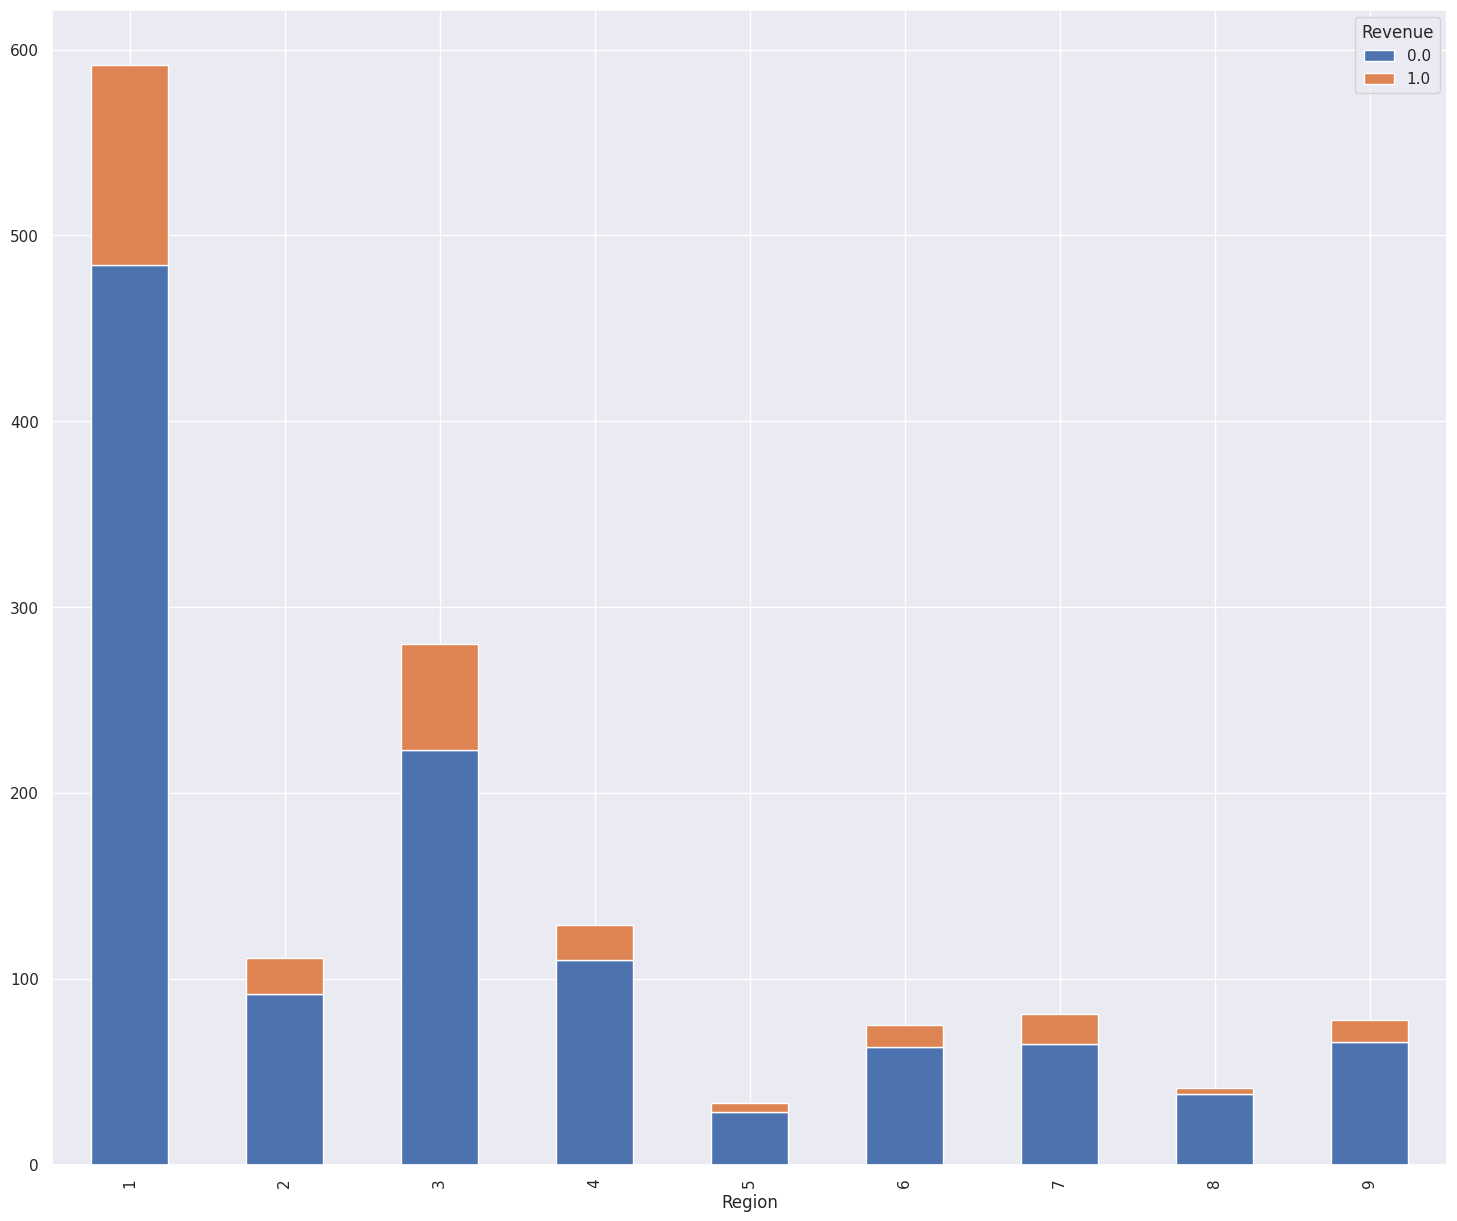

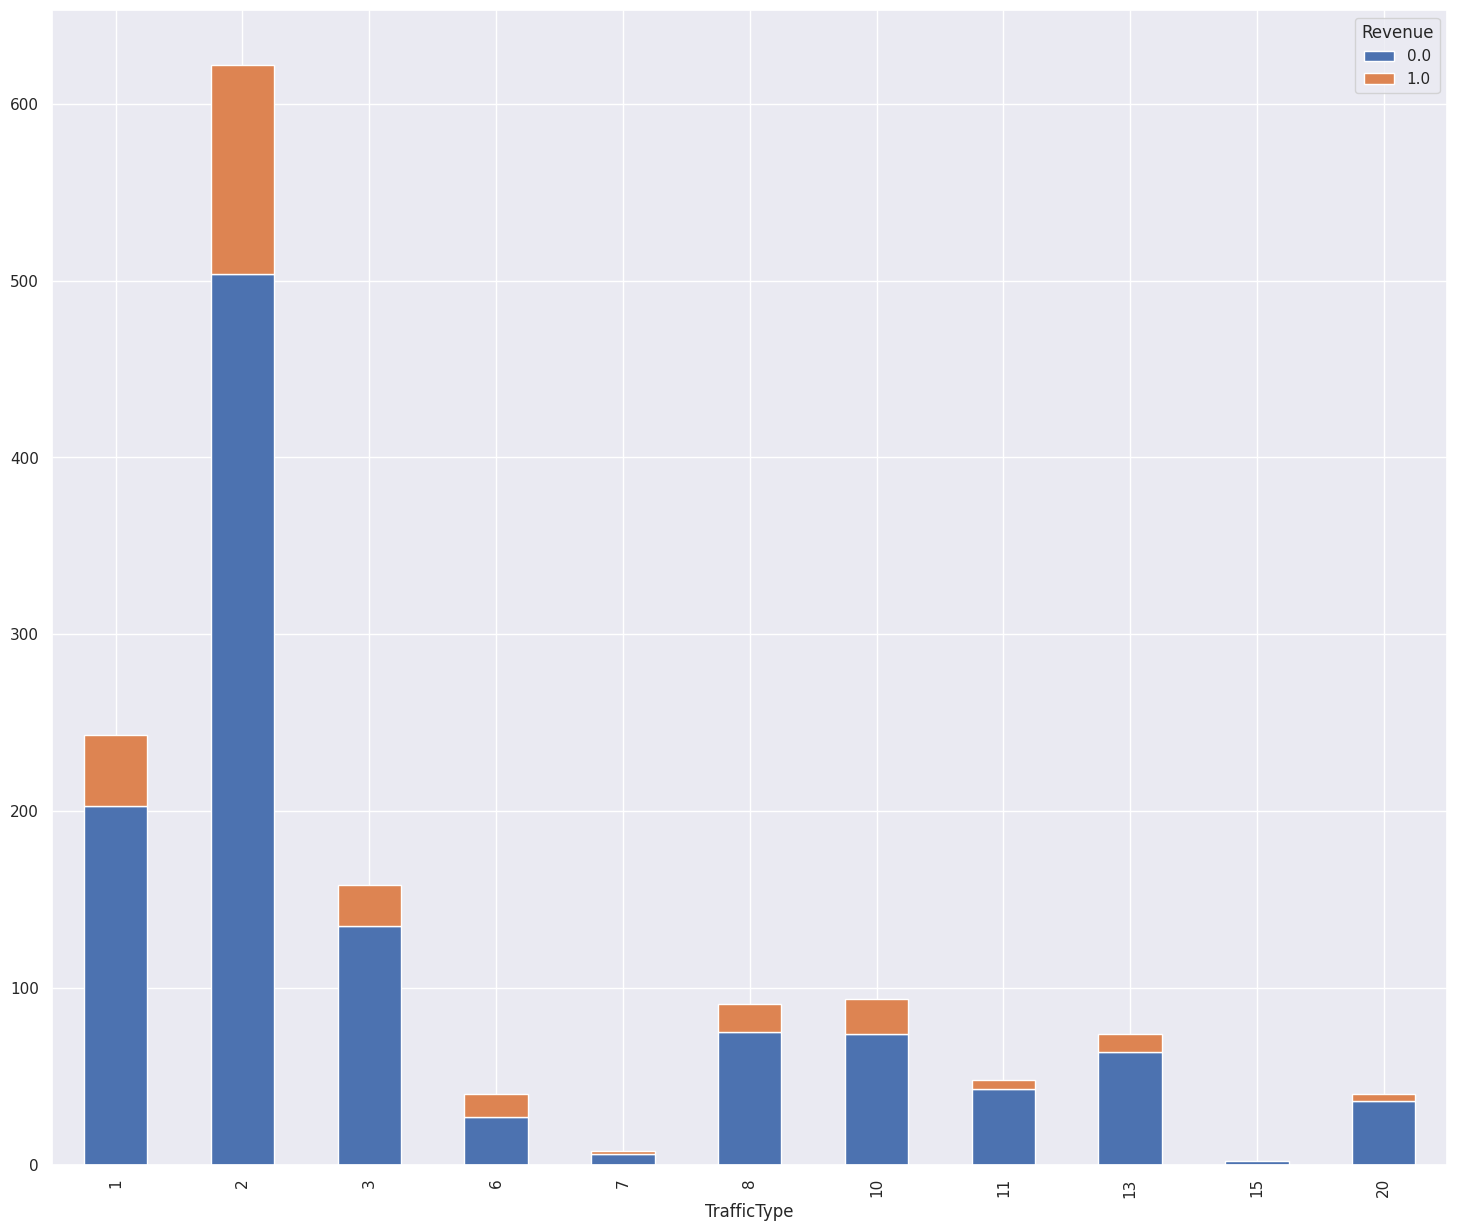

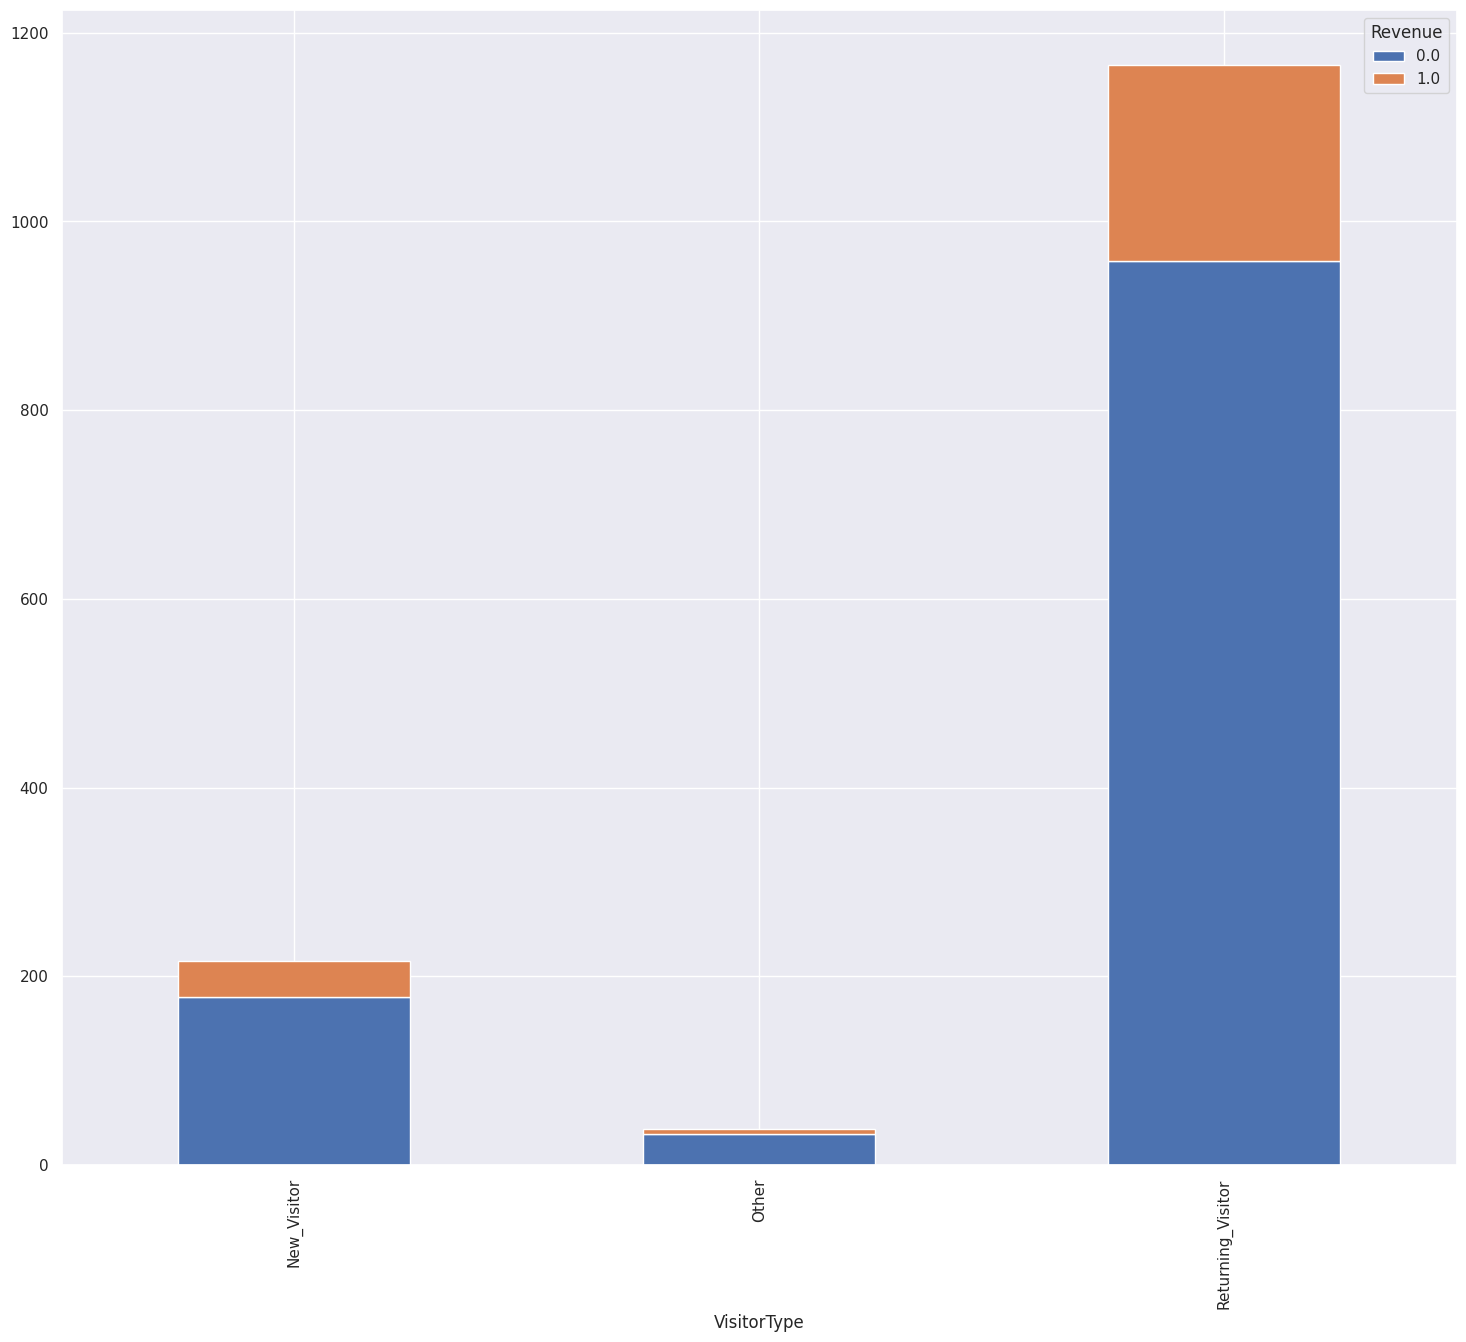

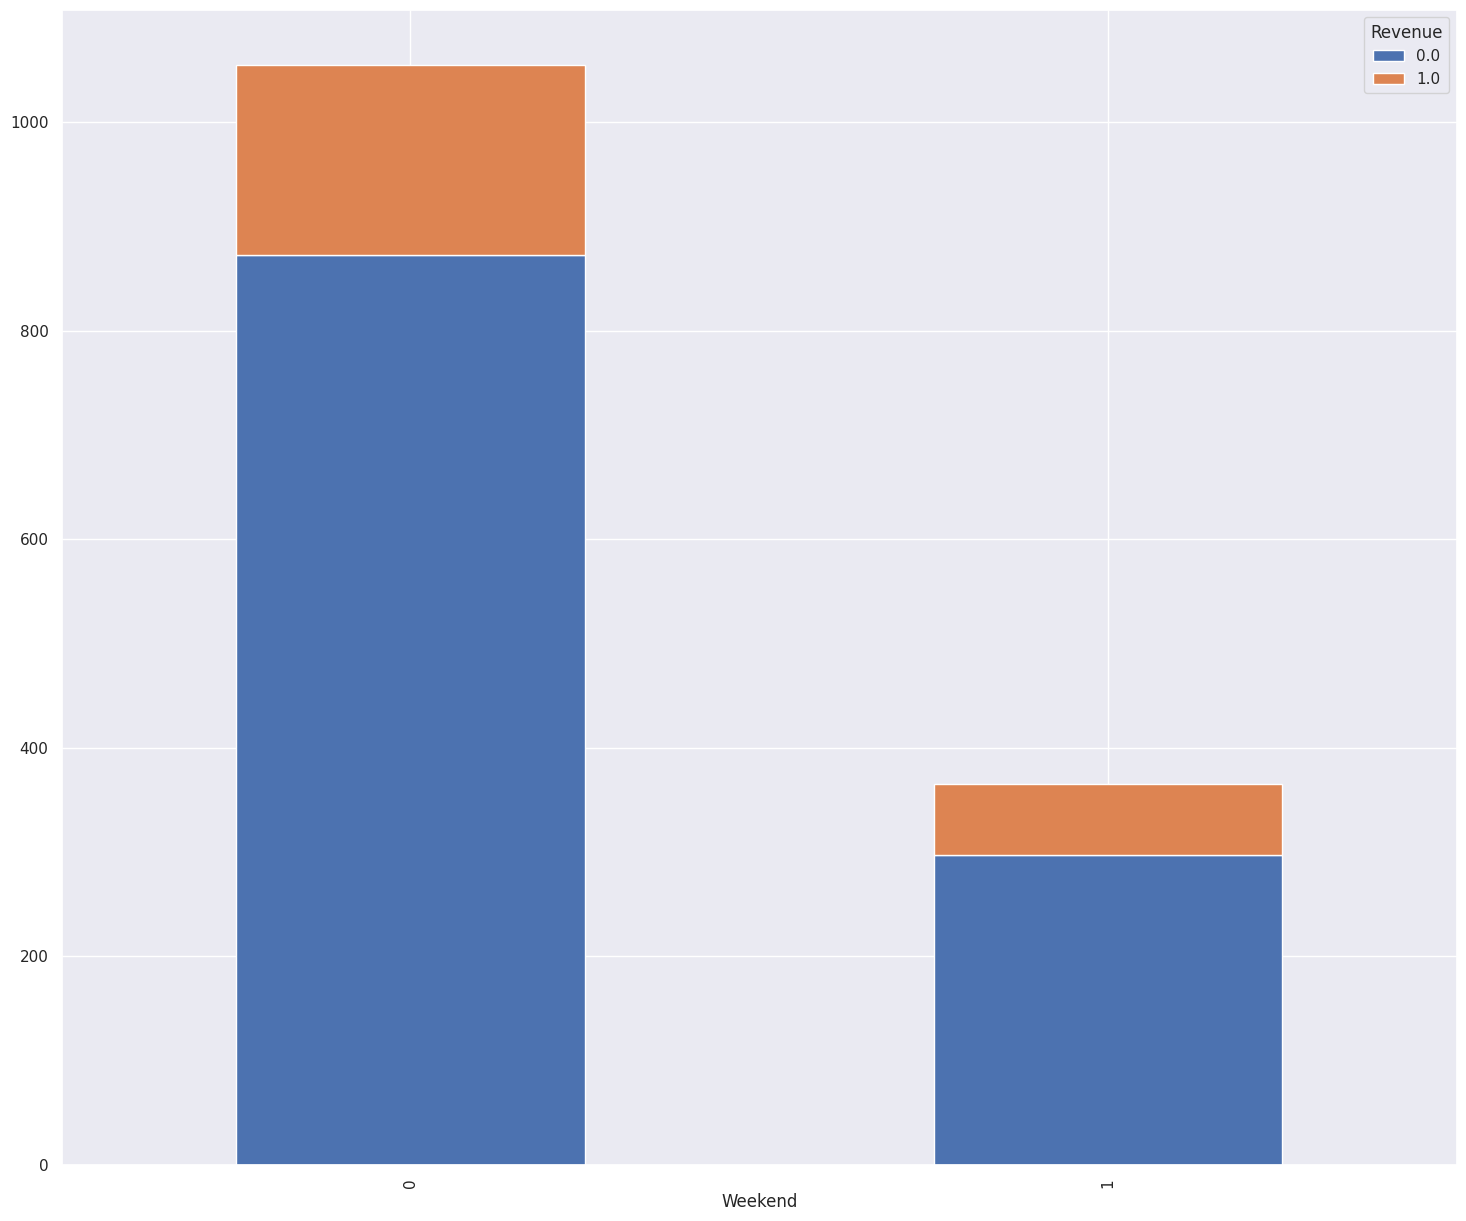

In [140]:
aryPlotCols_ignored = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', \
                'ExitRates', 'PageValues']
aryPlotCols = ['Month', 'OperatingSystems', 'Browser', 'Region', \
               'TrafficType', 'VisitorType', 'Weekend']
pdf_plot = pdf_xTrain.copy()
pdf_plot['Revenue'] = y_train

#--- plot freq of Revenue vs colName
for colName in aryPlotCols:
  pdf_plot.groupby([colName, 'Revenue'])[colName].count()\
            .unstack('Revenue').fillna(0)\
            .plot(kind='bar', stacked=True)
  
  #pdf_plot = pdf_plot.head(10)
  #pdf_plot = pdf_plot.unstack('Revenue').fillna(0)
  #pdf_plot.plot(kind='bar', stacked=True)


#### Findings:  Bi-variate Analysis (categorical)
- Month:  No noticable/interesting observations
- OperatingSystems:  OS #2 appears to drive significantly more traffic and Revenue, with OS #1 and #3 following.  Is this indicatve of user experience in some way due to performance? However the ratio between traffic and purchase rate is still comparable. What is applicable/repeatable for OS #4, and #8?
- Browser:  Browser #2 leads by a marked amount, followed by browser #1, and then #4.  Ratio of purchase to traffic seems higher for browser #2 comparitively.  Possibly a UX or performance difference?  It may serve to provide this to the UX or performance testers to see if there is any correlation here.  
- Region:  Region #1, #3, then #2, #4, #7 sees the most revenue.  What patterns exist that could give us some insights as to how to serve these regions better? 
- Traffic Type:  Revenue is driven most by TrafficType #2, then #1, #3, #10.  What further insights can help us to repeat and replicate?
- VisitorType:  Returning Visitors drive the most revenue, then new visitors.  Further analysis into this could help us to establish realistic campaigns and metrics for overall conversion.  We can then set us marketing strategies to groom new visitors to entice them to return.  And then strategies to better serve returning visitors.
- Weekend:  mooks like more overall traffic occurs during the week and more revenue realized.  However, although there is less overall traffic and sales on the weekend, it looks like the ratio of revenue to traffic is slightly higher on the weekend.  It may serve to compare based on traffic and revenue per day, week: across 5 days, and weekend across 2 days.

#### Analyze distribution of numerical data

/home/kidcoconut/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kidcoconut/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kidcoconut/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

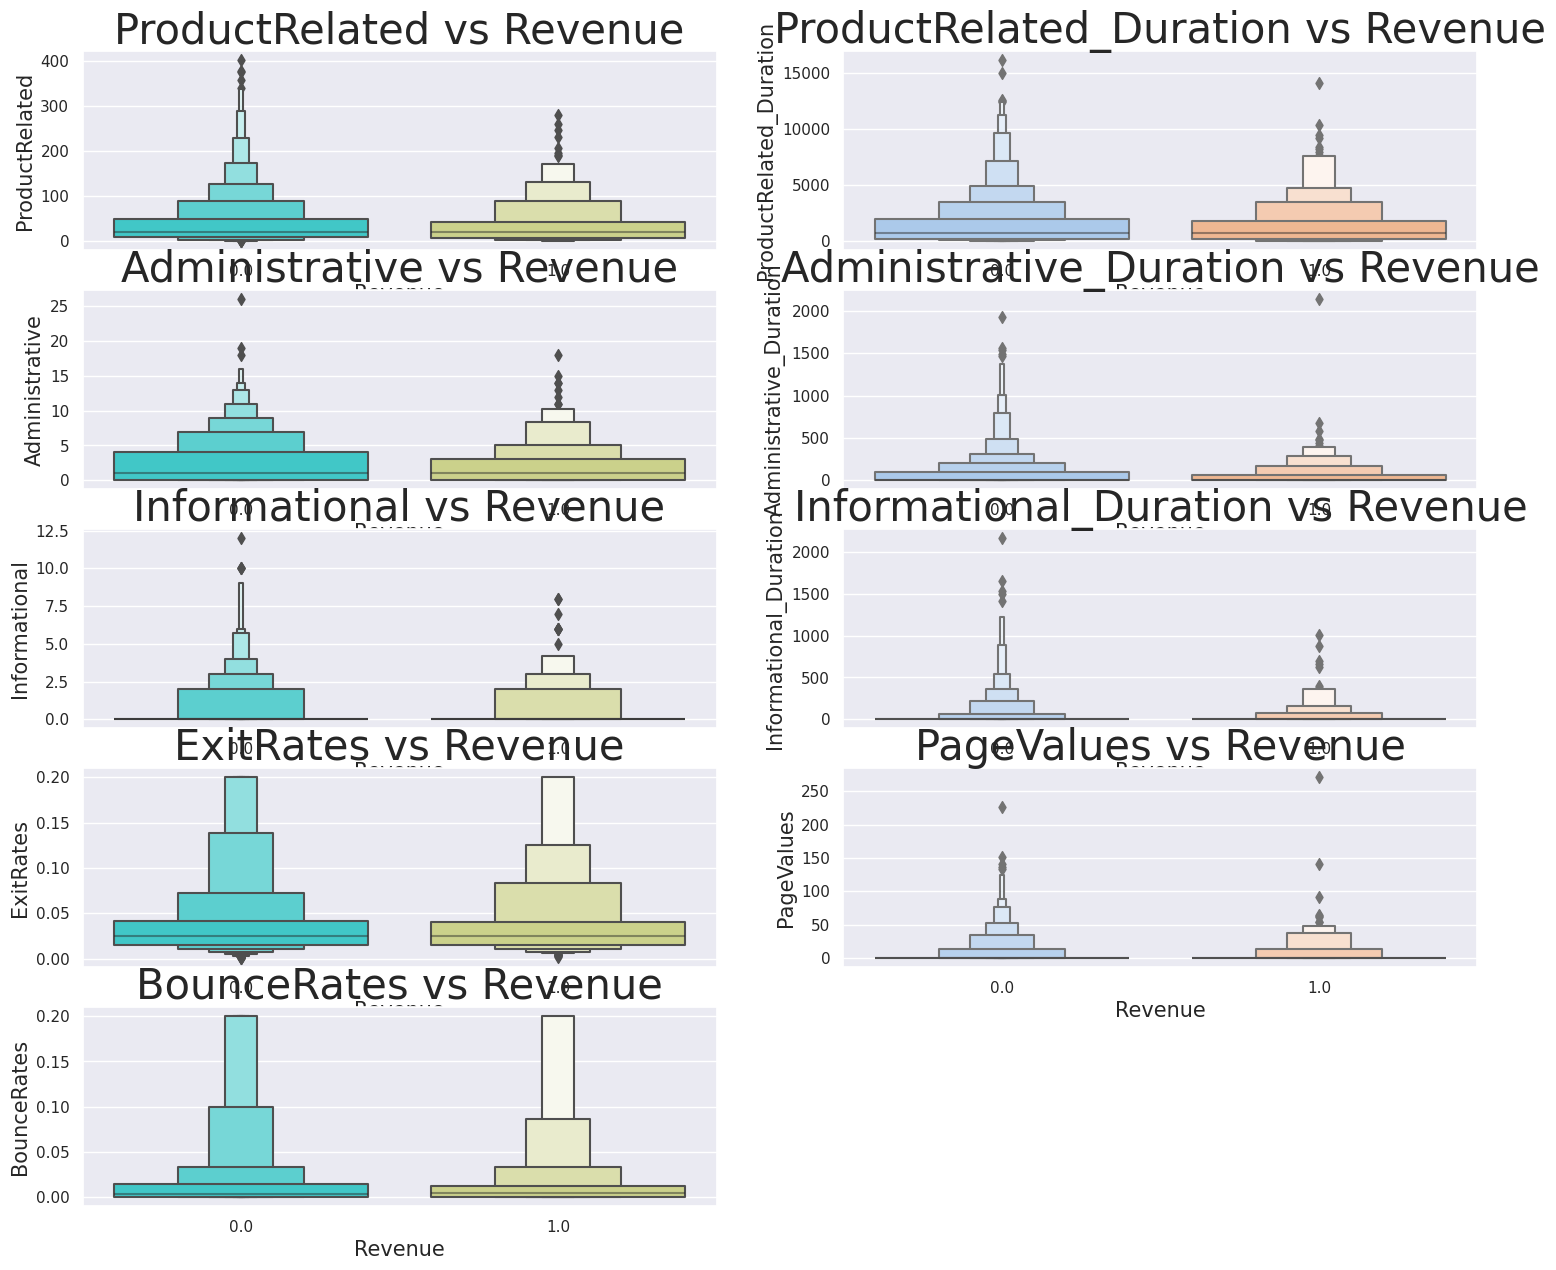

In [141]:
plt.rcParams['figure.figsize'] = (18, 15)
kstrXAxis = 'Revenue'
klngMaxRows = 5
klngMaxCols = 2

def plotNumericFeature(mySns, myPlt, pdfPlotData, idxPosition, \
                       strXAxis, strYAxis, strPalette):
    myPlt.subplot(klngMaxRows, klngMaxCols, idxPosition)
    mySns.boxenplot(pdfPlotData[strXAxis], \
              pdfPlotData[strYAxis], palette = strPalette)
    myPlt.title(strYAxis + ' vs ' + strXAxis, fontsize = 30)
    myPlt.xlabel(strXAxis, fontsize = 15)
    myPlt.ylabel(strYAxis, fontsize = 15)


#--- ProductRelated vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 1, kstrXAxis, 'ProductRelated', 'rainbow')

#--- ProductRelated_Duration vs revenue
plotNumericFeature(sns, plt, pdf_plot, 2, kstrXAxis, 'ProductRelated_Duration', 'pastel')

#--- Administrative vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 3, kstrXAxis, 'Administrative', 'rainbow')

#--- Administrative_Duration vs revenue
plotNumericFeature(sns, plt, pdf_plot, 4, kstrXAxis, 'Administrative_Duration', 'pastel')

#--- Informational vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 5, kstrXAxis, 'Informational', 'rainbow')

#--- Informational_Duration vs revenue
plotNumericFeature(sns, plt, pdf_plot, 6, kstrXAxis, 'Informational_Duration', 'pastel')

#--- ExitRates vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 7, kstrXAxis, 'ExitRates', 'rainbow')

#--- PageValues vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 8, kstrXAxis, 'PageValues', 'pastel')

#--- BounceRates vs Revenue
plotNumericFeature(sns, plt, pdf_plot, 9, kstrXAxis, 'BounceRates', 'rainbow')


plt.show()

#### Bivariate Analysis:  Numerical Features
- ProductRelated:  there is a similar distribution of product related pages between Revenue and non-Revenue.  There is just more traffic on the non-Revenue side.  This tells me that the decision to purchase is not being influenced by the Product alone.  It may be effective enough to drive the overall volume of visitors, then determine how to shorten the #of return visits, time-to-decision, and time-to-purchase.   
- ProductRelated_Duration:  similar findings as before.  The distribution of visitor time is similar between deciding on a purhase and not.  There are a few browsing customers who may linger longer but they are not the majority.  There are also a few purchasers who linger almost as long as those who do not purchase but they are also not the majority.  Is it possible that shoppers are struggling to find something in mind?  
- Informational, Administrative:  very odd that visitors who are spedning time on administrative and informational pages convert to purchasers.  Is it possible that they are repurchasing past orders, or referencing saved or wish items?  These may be analyzed as indicators of likelihood and time to purchase.
- ExitRates:  the values look relatively/roughly comparitive between purchasers and non purchasers.  Inconclusive.
- PageValues:  There seems to be a group of PageValues that see more purchase results than others, however these look like the same Page Values that see non-purchase as well.  Conversely there are a group of PageValues that see visits but relatively less sales.  This may be an effect of the months that we are looking at under Train, and the gap of time between browse and purchase.  However, this may be a good metric to analyze and attempt to influence/optimize. 
- BounceRates:  the values look relatively/roughly comparitive between purchasers and non purchasers. Inconclusive.


### EDA:  flag categorical columns

In [142]:

#--- inspect numerical columns
aryColsNumeric = pdf_map._get_numeric_data().columns

#--- output of numeric columns
#--- 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
#    'Revenue'
aryColsNonCateg = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']   

pdfCateg = pdf_map.drop(aryColsNonCateg, axis=1)
aryColsCateg = pdfCateg.columns

print("INFO:  Non-Categorical columns - ", aryColsNonCateg)
print("INFO:  Categorical columns - ", aryColsCateg)
print("INFO:  pdf_map columns - ", pdf_map.columns)


INFO:  Non-Categorical columns -  ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
INFO:  Categorical columns -  Index(['Administrative', 'Informational', 'ProductRelated', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')
INFO:  pdf_map columns -  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


#### Findings:
- we have 6 non-categorical features (to be numerically scaled)
- we have 11 categorical features (not including the Revenue target, or one-hot encoded VisitorTypes)
- we will look at ways to reduce this feature set through an inspection of correlated columns

### EDA:  One-hot encode select categorical cols

In [143]:
#--- check to see which columns are categorical object types
aryColsObj = pdf_map.select_dtypes("object").columns
print("INFO:  review object data types ...")
print(aryColsObj)

#--- confirmed:  VisitorType is the only object type;  we will want to one-hot encode
aryColsObj = ['VisitorType', 'OperatingSystems', 'Region', 'TrafficType', 'Browser']
aryColsOneHot = aryColsObj

#--- dbl-check:  review all column data types
print("INFO:  review column data types ...")
print(pdf_map.dtypes)


#--- set categorical/non-categorical cols
pdfCateg = pdf_map[aryColsCateg]
pdfNonCateg = pdf_map[aryColsNonCateg]

pdfCateg = pdfCateg.astype('category')



INFO:  review object data types ...
Index(['VisitorType'], dtype='object')
INFO:  review column data types ...
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object


In [150]:
#--- one-hot encode the categorical features (training data)
pdf_oneHot = pd.get_dummies(pdf_map, columns=aryColsOneHot, drop_first=True)

pdf_oneHot.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Feat Eng:  inspect correlated features

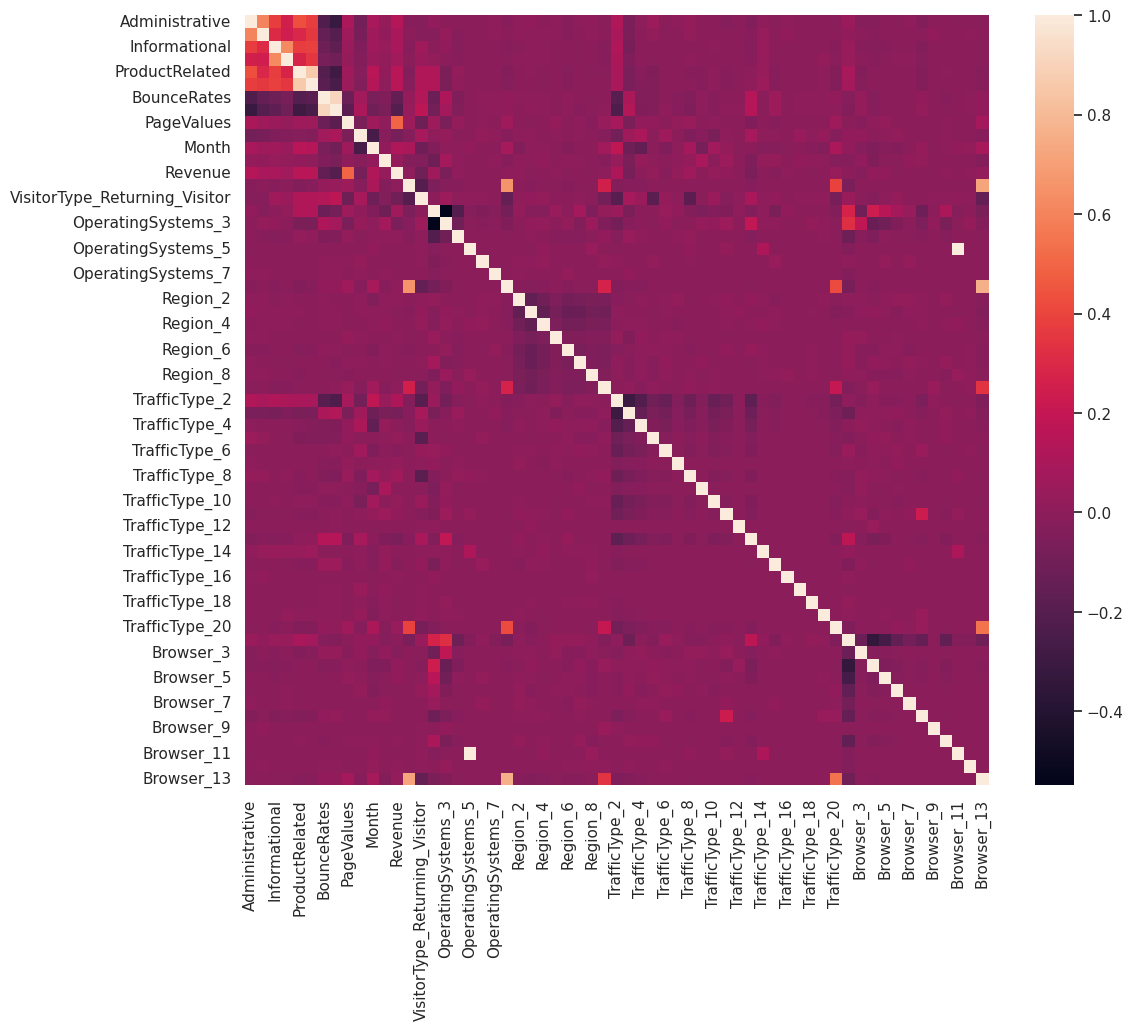

In [151]:
#--- store target feature
pdf_intent = pdf_oneHot
#y = pdf_intent.pop("Revenue")
y = pdf_intent["Revenue"]


#--- inspect correlated features
plt.figure(figsize=(12,10))
corr = pdf_intent.corr(method="pearson")
sns.heatmap(corr)
plt.show()

### Feat Selection

In [153]:
#--- let's remove all highly-correlated cols;  corr values between 1 and threshold value
sngThreshold = 0.8
lngNumFeats = corr.shape[0]
aryColsKeep = np.full((lngNumFeats,), True, dtype=bool)            #--- initialize tracking array

for idxRow in range(lngNumFeats):
    for idxCol in range(idxRow+1, lngNumFeats):
        if corr.iloc[idxRow, idxCol] >= sngThreshold:
            if aryColsKeep[idxCol]:
                aryColsKeep[idxCol] = False                              #--- flag col for drop;  highly correlated

aryColsSel = pdf_intent.columns[aryColsKeep]
print("INFO:  low-corr cols ... ", aryColsSel)

#--- threshold 0.9:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', \
        # 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'Weekend', \
        # 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'OperatingSystems_2', 'OperatingSystems_3', \
        # 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', \
        # 'OperatingSystems_8', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', \
        # 'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', \
        # 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', \
        # 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', \
        # 'TrafficType_19', 'TrafficType_20', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', \
        # 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_12', 'Browser_13'

#--- threshold of 0.8 does not reduce # of features that much
#--- threshold 0.8:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', \
#       'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'Weekend', 'VisitorType_Other', \
#       'VisitorType_Returning_Visitor', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', \
#       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Region_2', \
#       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_2', \
#       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', \
#       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14', \
#       'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', \
#       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', \
#       'Browser_10', 'Browser_12', 'Browser_13']


INFO:  low-corr cols ...  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'Weekend', 'Revenue', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15',
       'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Brows

In [158]:


#--- let's look at which cols are most correlated to the target variable
pdf_corr = corr
pdf_corrRev = pdf_corr[['Revenue']].sort_values(by='Revenue', ascending=False)
pdf_corrRev.style.background_gradient(cmap='coolwarm')

,Revenue
Revenue,1.000000
PageValues,0.492569
ProductRelated,0.158538
ProductRelated_Duration,0.152373
Administrative,0.138917
Month,0.127372
TrafficType_2,0.116347
Informational,0.095200
Administrative_Duration,0.093587
Informational_Duration,0.070345


#### Feature Selection

In [178]:
#--- I want to select only those features where the weighting has a +/- \
#    influence within a certain threshold
sngThreshold = 0.02

def map_absWeight(x):
    return abs(x)

pdf_corrAbsRev = pdf_corrRev.copy()
pdf_corrAbsRev['Revenue'] = pdf_corrAbsRev['Revenue'].map(map_absWeight) 

#pdf_corrRev = pdf_corrAbsRev[['Revenue']].sort_values(by='Revenue', ascending=False)
pdf_corrAbsRev = pdf_corrAbsRev[pdf_corrAbsRev['Revenue'] > sngThreshold]
pdf_corrAbsRev.sort_values(by='Revenue', ascending=False).style.background_gradient(cmap='coolwarm')

,Revenue
Revenue,1.000000
PageValues,0.492569
ExitRates,0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,0.150673
Administrative,0.138917
Month,0.127372
TrafficType_2,0.116347
VisitorType_Returning_Visitor,0.103843


In [196]:
#--- get the features that meet the threshold requirement
aryColsKeep = []
for row in pdf_corrAbsRev.index:
    aryColsKeep.append(row)

print("INFO:", \
      "\nlen pdf_corrAbsRev:\t", pdf_corrAbsRev.shape[0], \
      "\nlen aryColsKeep:\t", len(aryColsKeep), \
      "\naryColsKeep:\n", aryColsKeep)

INFO: 
len pdf_corrAbsRev:	 27 
len aryColsKeep:	 27 
aryColsKeep:
 ['Revenue', 'PageValues', 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Month', 'TrafficType_2', 'Informational', 'Administrative_Duration', 'Informational_Duration', 'OperatingSystems_2', 'TrafficType_8', 'TrafficType_20', 'Weekend', 'TrafficType_5', 'TrafficType_10', 'TrafficType_7', 'Browser_13', 'TrafficType_15', 'Browser_3', 'TrafficType_13', 'OperatingSystems_3', 'SpecialDay', 'TrafficType_3', 'VisitorType_Returning_Visitor', 'BounceRates', 'ExitRates']


#### Findings:  Correlated Columns
- Adminstrative:    highly-correlated with its corresponding _Duration;  this makes good sense
- Product Related:  same as above;  highly correlated with its _Duration;  no surprises here
- Informational:    same as above;  highly correlated with its _Duration;
- Bounce Rates:     highly correlated with Exit Rates;  expected 
- Month:            looks to be slightly negatively correlated with SpecialDay;  this may just be that special days are clustered at the start/end fo the year
- Exit Rates:       slightly negatively correlated with Administrative, Product Related, and Page Values 

In [197]:


#--- one-hot encode train and test data
X_train_oneHot = pd.get_dummies(pdf_xTrain, columns=aryColsOneHot, drop_first=True)
X_test_oneHot = pd.get_dummies(pdf_xTest, columns=aryColsOneHot, drop_first=True)


#--- create a function to fill in the missing columns for test and train sets
def fill_missing_cols(df_a, df_b):
  missing_cols = set(df_a.columns) - set(df_b.columns)
  for c in missing_cols:
    df_b[c] = 0
  df_b = df_b[df_a.columns]

#--- fill missing columns for test and train sets
fill_missing_cols(X_train_oneHot, X_test_oneHot)
fill_missing_cols(X_test_oneHot, X_train_oneHot)

#--- drop cols not flagged during feature eng
aryColsKeep.remove('Revenue')
X_train_featEng = X_train_oneHot[aryColsKeep]
X_test_featEng = X_test_oneHot[aryColsKeep]

#---  drop columns that are not expected to improve the prediction
#       Month, SpecialDay
aryDropCols = ['Month', 'SpecialDay']
X_train_featEng = X_train_featEng.drop(aryDropCols, axis=1)
X_test_featEng = X_test_featEng.drop(aryDropCols, axis=1)

X_train_featEng.head(5)
#X_test_featEng.head(5)



/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,PageValues,ProductRelated,ProductRelated_Duration,Administrative,TrafficType_2,Informational,Administrative_Duration,Informational_Duration,OperatingSystems_2,TrafficType_8,...,TrafficType_7,Browser_13,TrafficType_15,Browser_3,TrafficType_13,OperatingSystems_3,TrafficType_3,VisitorType_Returning_Visitor,BounceRates,ExitRates
0,0.0,1,207.570248,0,0,0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0.0,0.007937
1,0.0,11,201.133333,3,0,0,40.2,0.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.02
2,42.293068,3,120.4,1,0,0,63.4,0.0,0,0,...,0,0,0,0,0,0,1,0,0.0,0.0
3,28.06805,50,1342.083333,6,0,0,618.066667,0.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.004386
4,0.0,2,7.0,0,0,0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0.0,0.1


### Normalize Data:  Standard Scaling

In [198]:

#--- apply standard scalar to normalize col data
sclStd = StandardScaler()
aryColsScaled = X_train_featEng.columns

#-- fit on train, transform train and test
pdf_trainScaled = sclStd.fit(X_train_featEng)
npa_trainScaled = sclStd.transform(X_train_featEng)
npa_testScaled = sclStd.transform(X_test_featEng)  

#--- hold ref to dataframe
pdf_trainScaled = pd.DataFrame(npa_trainScaled, columns=aryColsScaled)
pdf_testScaled = pd.DataFrame(npa_testScaled, columns=aryColsScaled)

#--- reassign the target feature
pdf_trainScaled["tgtHasRevenue"] = y_train
pdf_trainScaled.head() 

,PageValues,ProductRelated,ProductRelated_Duration,Administrative,TrafficType_2,Informational,Administrative_Duration,Informational_Duration,OperatingSystems_2,TrafficType_8,...,Browser_13,TrafficType_15,Browser_3,TrafficType_13,OperatingSystems_3,TrafficType_3,VisitorType_Returning_Visitor,BounceRates,ExitRates,tgtHasRevenue
0,-0.329683,-0.709192,-0.545345,-0.745378,-0.783486,-0.432226,-0.490464,-0.256217,0.967228,-0.197062,...,-0.094616,-0.038166,-0.078401,-0.249865,-0.513828,-0.386369,0.466096,-0.436535,-0.693132,NaN
1,-0.329683,-0.518315,-0.548230,0.097648,-0.783486,-0.432226,-0.273180,-0.256217,0.967228,-0.197062,...,-0.094616,-0.038166,-0.078401,-0.249865,-0.513828,-0.386369,-2.145483,-0.436535,-0.423877,NaN
2,1.726178,-0.671017,-0.584414,-0.464370,-0.783486,-0.432226,-0.147782,-0.256217,-1.033883,-0.197062,...,-0.094616,-0.038166,-0.078401,-0.249865,-0.513828,2.588198,-2.145483,-0.436535,-0.870274,NaN
3,1.034701,0.226107,-0.036873,0.940674,-0.783486,-0.432226,2.850231,-0.256217,0.967228,-0.197062,...,-0.094616,-0.038166,-0.078401,-0.249865,-0.513828,-0.386369,-2.145483,-0.436535,-0.772380,NaN
4,-0.329683,-0.690105,-0.635238,-0.745378,-0.783486,-0.432226,-0.490464,-0.256217,0.967228,-0.197062,...,-0.094616,-0.038166,-0.078401,-0.249865,-0.513828,-0.386369,0.466096,-0.436535,1.361713,NaN


In [199]:
X_train = pdf_trainScaled.drop('tgtHasRevenue', axis=1).to_numpy()
y_train = y_train

X_test = pdf_testScaled.to_numpy()
y_test = y_test

### Model Fitting:  Logistic Regression

In [200]:

#--- create a logistic regression model
mdl_lr = LogisticRegression(random_state=0, \
                            class_weight='balanced', \
                            solver="liblinear", \
                            max_iter=150, \
                            penalty="l1").fit(X_train, y_train)
mdl_lr_predict = mdl_lr.predict(X_test)

### Model Performance:  Logistic Regresssion

In [204]:

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

#--- function to output performance metrics
def printPerfMetrics(y_target, mdl_predict):
    confMatrix = confusion_matrix(y_target, mdl_predict)
    acc   = accuracy(y_target, mdl_predict)
    rec   = recall(y_target, mdl_predict)
    prec  = precision(y_target, mdl_predict)
    f1    = f1_score(y_target, mdl_predict)

    print(f'Accuracy:\t{acc} \
          \nPrecision:\t{prec} \
          \nRecall:\t\t{rec} \
          \nF1-score:\t{f1} \
          \n')


/home/kidcoconut/miniconda3/envs/nbk_midterm_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:	0.9335246293639407           
Precision:	0.6021897810218978           
Recall:		0.8461538461538461           
F1-score:	0.7036247334754797           



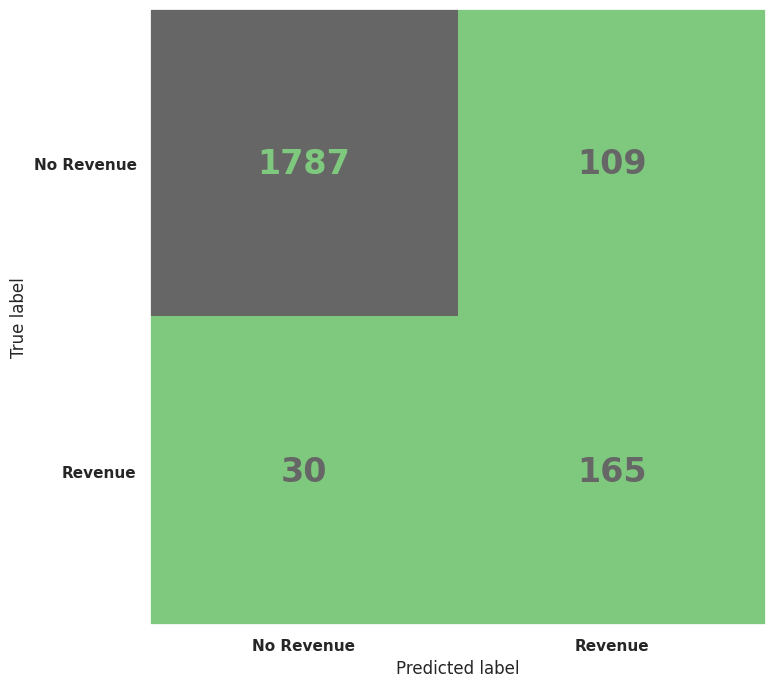

In [214]:


#--- display confusion matrix fr LogisticRegression model
plot_confusion_matrix(mdl_lr, X_test, y_test, \
                      display_labels=['No Revenue', 'Revenue'],
                      cmap='Accent', colorbar=False)
plt.rcParams["figure.figsize"] = [8, 8]

cfgFont = {'family' : 'sans-serif',
            'weight' : 'bold',
            'size'   : 24}
plt.rc('font', **cfgFont)
plt.grid(False)


#--- display perf metrics for Logistic Regression model
printPerfMetrics(y_test, mdl_lr_predict)

#### Findings
- Accuracy (overall correctness) is very good at over 93%;  the model is very good at making predictions of true positives
- Precision (predicting a specific category) is not amazing;  we have just better than flipping a coin (60%) for predicting Revenue when the actual was No Revenue
- Recall (frequency of predicting a specific category) is very good at almost 85%
- F1 Score (harmonic balance between Precision and Recall) is good at roughly 70%

Overall, I think the Logistic Regression model has performed well.  We know we have a class imbalance between train and test, so our judgment should be weighed more on the F1 score.

To determine how much weight to place on Accuracy, we consider whether false psoitives and false negatives have similar costs.

The cost of a false negative is predicted No Revenue when there was actual Revenue.  From a business perspective, this would represent a pleasant surprise.  However, if we were to reduce inventory anticipating lower sales, we would actually end up with a missed opportunity.  This would be very bad for us, and very good for our competitors.  However if there was more traffic in the store/site, we can find other ways to capture sales.

The cost of a false positive is predicted Revenue when there was no actual Revenue.  From a business perspective, we would ensure enough product to meet the same expectation, but end up with more stock on hand than we can sell.  Depending on the amount of surplus inventory, this could be very bad.

Assessment:  Accuracy should be given some weight as the false positive vs false negative has comparable (negative) ramifications, with an optimistic leaning towards false negatives given unforeseen increased traffic.  

#### Model Fitting:  Random Forest Classifier

In [215]:

#--- create a Random Forest Classifier model
mdl_rf = RandomForestClassifier(random_state=0, \
                            max_depth=2, \
                            class_weight="balanced")
mdl_rf.fit(X_train, y_train)
mdl_rf_predict = mdl_rf.predict(X_test)

#### Model Performance:  Random Forest Classifier

/home/kidcoconut/miniconda3/envs/nbk_midterm_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:	0.9182209469153515           
Precision:	0.5327868852459017           
Recall:		1.0           
F1-score:	0.6951871657754011           



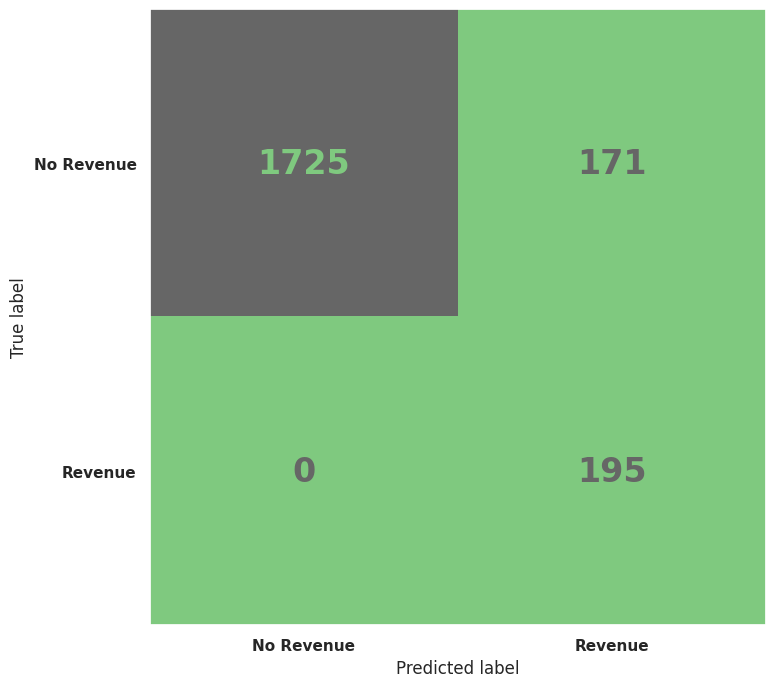

In [216]:
#--- display confusion matrix for Random Forest Classifier model
plot_confusion_matrix(mdl_rf, X_test, y_test, \
                      display_labels=['No Revenue', 'Revenue'],
                      cmap='Accent', colorbar=False)
plt.rcParams["figure.figsize"] = [8, 8]

cfgFont = {'family' : 'sans-serif',
            'weight' : 'bold',
            'size'   : 24}
plt.rc('font', **cfgFont)
plt.grid(False)


#--- display perf metrics for Random Forest Classifier model
printPerfMetrics(y_test, mdl_rf_predict)

#### Findings
- Accuracy (overall correctness) is very good at over 91%;  the model is very good at making predictions of true positives.  LogR was better than RandomForest
- Precision (predicting a specific category) is not amazing;  we have just better than flipping a coin (53%) for predicting Revenue when the actual was No Revenue.  LogR was also better here
- Recall (frequency of predicting a specific category) is concerningly good at 100%.  RandomForest wins here.
- F1 Score (harmonic balance between Precision and Recall) is good at roughly 70%.  Roughly a tie, but LogR is slightly better here.

My decision is to stay with LogR for overall better performance, but also b/c I am very concerned re the Recall of 1.  I am interested to research this more.  My immediate thoughts are to review (given time) the data, overfitting/leakage, feature selection flaw, and whether there is some deterministic nature to the problem domain.


### Model Selection:  LogisticRegression

### Hyper-parameter Tuning:  LogisticRegression
- The main hyperparameters to tune in LR are: solver, penalty, and regularization strength
- solver is the alg to use in the optimization. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.
- Penalty (or regularization) intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting. Technique discourages learning a more complex model, so as to avoid the risk of overfitting. The choices are: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’. However, some penalties may not work with some solvers
- C (or regularization strength) must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.
- Logistic regression offers other parameters like: class_weight, dualbool (for sparse datasets when n_samples > n_features), max_iter (may improve convergence with higher iterations), and others. However, these provide less impact.

In [226]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#--- init param grid
#--- note:  C must be a positive float;  but regardless trying to converge with ranges [-3, 3], [-1, 1], [0,1]
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'], 
    'C'       : np.logspace(-1,1,7),                           
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}


#--- GridSearchCV will help us find the best hyperparams
mdl_lr_hyp = LogisticRegression()
mdl_grid_cv = GridSearchCV(mdl_lr_hyp,                          #--- our model
                        param_grid = param_grid,                #--- params 
                        scoring='neg_mean_squared_error',       #--- scoring metric;  neg_mean_squared_error vs accuracy
                        cv=10)                                  #--- num folds

mdl_grid_cv.fit(X_train, y_train)

#--- INSPECT:  hypertuned params
print("Tuned Hyperparameters :", mdl_grid_cv.best_params_)
print("Neg Mean Sq :", mdl_grid_cv.best_score_)


Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Neg Mean Sq : -0.15491139433329945


#### Model Optimization:  Logistic Regression with Hyperparam tuning
- Note:  No opt change for the values of penalty (l1), solver (liblinear)
- Note:  C defaults to 1.0;  C is opt to 0.1 (neg_mean_squared), and 1.0 (accuracy)

There are no improvements to be seen with the scoring=accuracy approach;  so let's explore the scoring=neg_mean_squared_error

 Now that we have our hyperparamters, lets tune the model and inspect what improvements compared to the orig logR model

Accuracy:	0.9354375896700143           
Precision:	0.6111111111111112           
Recall:		0.8461538461538461           
F1-score:	0.7096774193548387           



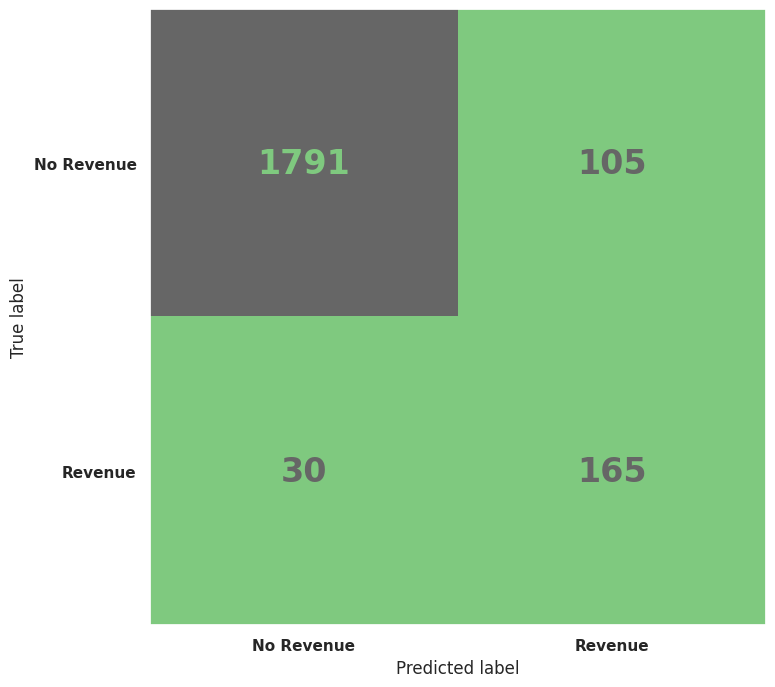

In [227]:

#--- re-create the LogR model with hyperparam tuning
mdl_lr = LogisticRegression(random_state=0, \
                            class_weight='balanced', \
                            solver="liblinear", \
                            max_iter=150, \
                            penalty="l1", \
                            C=0.1)
mdl_lr.fit(X_train, y_train)
mdl_lr_predict = mdl_lr.predict(X_test)



#--- display confusion matrix for LogisticRegression model
plot_confusion_matrix(mdl_lr, X_test, y_test, \
                      display_labels=['No Revenue', 'Revenue'],
                      cmap='Accent', colorbar=False)
plt.rcParams["figure.figsize"] = [8, 8]

cfgFont = {'family' : 'sans-serif',
            'weight' : 'bold',
            'size'   : 24}
plt.rc('font', **cfgFont)
plt.grid(False)


#--- display perf metrics for Logistic Regression model
printPerfMetrics(y_test, mdl_lr_predict)


#--- for comparison ... the original perf scores for LogR
#Accuracy:	0.9335246293639407           
#Precision:	0.6021897810218978           
#Recall:	0.8461538461538461           
#F1-score:	0.7036247334754797 


#### Findings:  Hyperparameter tuning - Logistic Regression (scoring=neg_mean_squared_error)
- we see a slight improvement for Accuracy (+0.002),  Precision (+0.01), Recall (+0.00), F1-score (+0.006)



# Task 2:  Customer Segmentation
Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

We will perform clustering using K-Means

In [ ]:
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

In [ ]:
#--- look at the entire dataset
pdf_clusterSet = pdf_raw_csv

K = range(1, 10)
visualize_elbow(X, K)

# Task 3:  Semi-Supervised Learning

## Data Engineering

## Self-labelling

## Comparison of Model Performance:  labels only vs labels and self-labels

# Conclusions

## Supervised Learning

## Unsupervised Learning

## Semi-supervised Learning